# TCR analysis of DPT... using the VDJ object Kelvin has generated.


## Loading data

Load up all pacakges

In [1]:
import os
import scanpy as sc
import pandas as pd
import dandelion as ddl
from tqdm import tqdm

# show the current directory
os.getcwd()


'/Users/uqssoon/Documents/Projects/Jaz-project/notebooks'

In [2]:
# software versions

sc.logging.print_header()

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/umap/distances.

scanpy==1.9.3 anndata==0.9.2 umap==0.5.3 numpy==1.24.4 scipy==1.11.1 pandas==1.5.3 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10


/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.


In [3]:
ddl.logging.print_header()

dandelion==0.3.3.dev41 pandas==1.5.3 numpy==1.24.4 matplotlib==3.7.2 networkx==3.1 scipy==1.11.1


#### This is all pre-processing done by Kelvin. DO NOT RUN THIS. 

I'm accessing the data through the HPC so the data lives at `/QRISdata/Q5688/GONZ-0001/TCR/` and `/QRISdata/Q5688/GONZ-0001_run2/TCR/`. I've assigned the locations to two variables via a dictionary.

In [4]:
# RAWFOLDER1 = "/QRISdata/Q5688/GONZ-0001/TCR"
# RAWFOLDER2 = "/QRISdata/Q5688/GONZ-0001_run2/TCR"
##  also specify the names of the folders (sans _GEX for simplicity)
# sample_dict = {
#    "CD4_L01": RAWFOLDER2,
#    "CD4_P01": RAWFOLDER1,
#    "CD4_WY": RAWFOLDER2,
#    "CD8_L01": RAWFOLDER1,
#    "CD8_P01": RAWFOLDER1,
#    "CD8_WY": RAWFOLDER2,
#    "DP_L01": RAWFOLDER1,
#    "DP_P01": RAWFOLDER1,
#    "DP_WY": RAWFOLDER1,
#    "V_CD4": RAWFOLDER1,
#    "V_CD8": RAWFOLDER2,
#    "V_DP": RAWFOLDER1,
# }



## And then read in files... using for-loop - read files, add them to a list, concatenate them, save. 

# from pathlib import Path

# vdj_list = []  # create an empty list first
# for sample in tqdm(sample_dict.keys()):
    # we will use Path to construct the path to the 10x file
    # you can also just use
    # file_path = "/QRISdata/Q5688/GONZ-0001/TCR/" + sample + "_TCR/outs/filtered_contig_annotations.csv"
    # exactly the same
#    file_path = (
#        Path(sample_dict[sample])
#        / (sample + "_TCR")
#        / "outs"
#        / "filtered_contig_annotations.csv"
#    )
#    tmp = ddl.read_10x_vdj(file_path)
#    tmp.data.cell_id = [sample + "_" + n for n in tmp.data.cell_id]
#    tmp.data.sequence_id = [sample + "_" + n for n in tmp.data.sequence_id]
#    tmp.update_metadata()
    # ok now concatenate
#    vdj_list.append(tmp)


#### Actually concatenate

# vdj = ddl.concat(vdj_list)
# vdj

### making output directory
# out_path = Path("/QRISdata/Q5688") / "kelvin" / "h5ad"
# out_path.mkdir(parents=True, exist_ok=True)
# vdj.write_h5ddl(out_path / "adata_tcr_raw.h5ddl")


#### Let's read in

In [4]:
# first do GEX object 

adata = sc.read_h5ad("/Users/uqssoon/Documents/Projects/Jaz-project/Output_MS/objects/adata_processed_v2_BBKNN_celltypist_MS_300823.h5ad")

In [5]:
adata

AnnData object with n_obs × n_vars = 71564 × 2285
    obs: 'sample', 'sort_type', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'batch', 'CD4/CD8_geneset', 'leiden', 'celltypist_majority_voting', 'celltypist_annotation'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltypist_annotation_colors', 'celltypist_majority_voting_colors', 'donor_colors', 'filter_rna_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'sample_colors', 'sort_type_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [5]:
#### I had problems loading the ddl object as it was misisng the tables module. 
# https://stackoverflow.com/questions/73029883/could-not-find-hdf5-installation-for-pytables-on-m1-mac 

## I used the: 
#pip install cython
#brew install hdf5
#brew install c-blosc
#export HDF5_DIR=/opt/homebrew/opt/hdf5 
#export BLOSC_DIR=/opt/homebrew/opt/c-blosc     on the home environment 

# And then in Jaz2023_env I did:
#pip install git+https://github.com/PyTables/PyTables

In [6]:
vdj = ddl.read_h5ddl("/Users/uqssoon/Documents/Projects/Jaz-project/Output_MS/objects/adata_tcr_raw.h5ddl")


In [7]:
vdj

Dandelion class object with n_obs = 101224 and n_contigs = 169228
    data: 'cell_id', 'sequence_id', 'sequence', 'sequence_aa', 'productive', 'complete_vdj', 'vj_in_frame', 'junction', 'junction_aa', 'locus', 'v_call', 'j_call', 'c_call', 'd_call', 'consensus_count', 'duplicate_count', 'cdr3_start', 'cdr3_end', 'fwr1_start', 'fwr1_end', 'fwr1', 'fwr1_aa', 'cdr1_start', 'cdr1_end', 'cdr1', 'cdr1_aa', 'fwr2_start', 'fwr2_end', 'fwr2', 'fwr2_aa', 'cdr2_start', 'cdr2_end', 'cdr2', 'cdr2_aa', 'fwr3_start', 'fwr3_end', 'fwr3', 'fwr3_aa', 'fwr4_start', 'fwr4_end', 'fwr4', 'fwr4_aa', 'clone_id', 'raw_consensus_id_10x', 'exact_subclonotype_id_10x', 'high_confidence_10x', 'filtered_10x', 'is_cell_10x', 'is_asm_cell_10x', 'rearrangement_status'
    metadata: 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'jun

In [8]:
vdj.data

cell_id  \
sequence_id                                                         
CD4_L01_AAACCTGAGAACTGTA-1_contig_1-0  CD4_L01_AAACCTGAGAACTGTA-1   
CD4_L01_AAACCTGAGAACTGTA-1_contig_2-0  CD4_L01_AAACCTGAGAACTGTA-1   
CD4_L01_AAACCTGAGAACTGTA-1_contig_3-0  CD4_L01_AAACCTGAGAACTGTA-1   
CD4_L01_AAACCTGAGAGCTATA-1_contig_1-0  CD4_L01_AAACCTGAGAGCTATA-1   
CD4_L01_AAACCTGAGATGAGAG-1_contig_1-0  CD4_L01_AAACCTGAGATGAGAG-1   
...                                                           ...   
V_DP_TTTGTCAGTCTACCTC-1_contig_1-11       V_DP_TTTGTCAGTCTACCTC-1   
V_DP_TTTGTCAGTTCGTGAT-1_contig_1-11       V_DP_TTTGTCAGTTCGTGAT-1   
V_DP_TTTGTCAGTTCGTGAT-1_contig_2-11       V_DP_TTTGTCAGTTCGTGAT-1   
V_DP_TTTGTCATCAGCTTAG-1_contig_1-11       V_DP_TTTGTCATCAGCTTAG-1   
V_DP_TTTGTCATCGCCATAA-1_contig_1-11       V_DP_TTTGTCATCGCCATAA-1   

                                                                 sequence_id  \
sequence_id                                                                    
CD4_L01_AAACCTGAGAACTGTA-1_contig_1-0  CD4_L01_AAACCTGAGAACTGTA-1_contig_1-0   
CD4_L01_AAACCTGAGAACTGTA-1_contig_2-0  CD4_L01_AAACCTGAGAACTGTA-1_contig_2-0   
CD4_L01_AAACCTGAGAACTGTA-1_contig_3-0  CD4_L01_AAACCTGAGAACTGTA-1_contig_3-0   
CD4_L01_AAACCTGAGAGCTATA-1_contig_1-0  CD4_L01_AAACCTGAGAGCTATA-1_contig_1-0   
CD4_L01_AAACCTGAGATGAGAG-1_contig_1-0  CD4_L01_AAACCTGAGATGAGAG-1_contig_1-0   
...                                                                      ...   
V_DP_TTTGTCAGTCTACCTC-1_contig_1-11      V_DP_TTTGTCAGTCTACCTC-1_contig_1-11   
V_DP_TTTGTCAGTTCGTGAT-1_contig_1-11      V_DP_TTTGTCAGTTCGTGAT-1_contig_1-11   
V_DP_TTTGTCAGTTCGTGAT-1_contig_2-11      V_DP_TTTGTCAGTTCGTGAT-1_contig_2-11   
V_DP_TTTGTCATCAGCTTAG-1_contig_1-11      V_DP_TTTGTCATCAGCTTAG-1_contig_1-11   
V_DP_TTTGTCATCGCCATAA-1_contig_1-11      V_DP_TTTGTCATCGCCATAA-1_contig_1-11   

                                                                                sequence  \
sequence_id                                                                                
CD4_L01_AAACCTGAGAACTGTA-1_contig_1-0  TATATGGGAGAACTCACTGGGTTCTTCCCCAGGAGGACCAAGCCCT...   
CD4_L01_AAACCTGAGAACTGTA-1_contig_2-0  AAAGCAGATTCTTTTTATGATTTTTAAAGTAGAAATATCCATTCCA...   
CD4_L01_AAACCTGAGAACTGTA-1_contig_3-0  TTGGGGGAGAGGGGTGGGTACTGGAGAAGACCAGCCCCTTCGCCAA...   
CD4_L01_AAACCTGAGAGCTATA-1_contig_1-0  CCCACATGAAGTGTCTACCTTCTGCAGACTCCAATGGCTCAGGAAC...   
CD4_L01_AAACCTGAGATGAGAG-1_contig_1-0  GGAGTGATCCTGATCTGGTAAAGCTCCCATCCTGCCCTGACCCTGC...   
...                                                                                  ...   
V_DP_TTTGTCAGTCTACCTC-1_contig_1-11    TGGGGACTCTGCAGGGGAGCGCTGTCAGCATGACACGTGTTAGCTT...   
V_DP_TTTGTCAGTTCGTGAT-1_contig_1-11    AGTCAGAGGCCCCATCTCAGACCCGAGGCTAGCATGGGCTGCAGGC...   
V_DP_TTTGTCAGTTCGTGAT-1_contig_2-11    TTTCTTAGTTGGGATTCTCCATATTTCAGATATAAGATTTCAGTTC...   
V_DP_TTTGTCATCAGCTTAG-1_contig_1-11    ACAGACACAGTGCTGCCTGCCCCTTTGTGCCATGGGCTCCAGGCTG...   
V_DP_TTTGTCATCGCCATAA-1_contig_1-11    CTCACAGTGACCCTGATCTGGTAAAGCTCCCATCCTGCCCTGACTC...   

                                                                             sequence_aa  \
sequence_id                                                                                
CD4_L01_AAACCTGAGAACTGTA-1_contig_1-0  MGPGLLCWVLLCLLGAGPVDAGVTQSPTHLIKTRGQHVTLRCSPIS...   
CD4_L01_AAACCTGAGAACTGTA-1_contig_2-0  MKSLRVLLVILWLQLSWVWSQQKEVEQNSGPLSVPEGAIASLNCTY...   
CD4_L01_AAACCTGAGAACTGTA-1_contig_3-0                                                      
CD4_L01_AAACCTGAGAGCTATA-1_contig_1-0  MWGVFLLYVSMKMGGTTGQNIDQPTEMTATEGAIVQINCTYQTSGF...   
CD4_L01_AAACCTGAGATGAGAG-1_contig_1-0  MGTRLLFWVAFCLLGAYHTGAGVSQSPSNKVTEKGKDVELRCDPIS...   
...                                                                                  ...   
V_DP_TTTGTCAGTCTACCTC-1_contig_1-11    MTRVSLLWAVVVSTCLESGMAQTVTQSQPEMSVQEAETVTLSCTYD...   
V_DP_TTTGTCAGTTCGTGAT-1_contig_1-11    MGCRLLCCAVLCLLGAVPMETGVTQTPRHLVMGMTNKKSLKCEQHL...   
V_

In [9]:
vdj.metadata

clone_id clone_id_by_size locus_VDJ locus_VJ  \
CD4_L01_AAACCTGAGAACTGTA-1  clonotype4848             4803   TRB|TRB      TRA   
CD4_L01_AAACCTGAGAGCTATA-1           None             None      None      TRA   
CD4_L01_AAACCTGAGATGAGAG-1           None             None       TRB     None   
CD4_L01_AAACCTGAGGAGCGAG-1  clonotype5251             5617      None      TRA   
CD4_L01_AAACCTGAGGCAGTCA-1  clonotype1103             1210       TRB      TRA   
...                                   ...              ...       ...      ...   
V_DP_TTTGTCAGTCCTCCAT-1              None             None       TRB      TRA   
V_DP_TTTGTCAGTCTACCTC-1              None             None      None      TRA   
V_DP_TTTGTCAGTTCGTGAT-1        clonotype5                5       TRB      TRA   
V_DP_TTTGTCATCAGCTTAG-1      clonotype589              479       TRB     None   
V_DP_TTTGTCATCGCCATAA-1              None             None       TRB     None   

                           productive_VDJ productive_VJ v_call_VDJ d_call_VDJ  \
CD4_L01_AAACCTGAGAACTGTA-1     True|False          True    TRBV5-5       None   
CD4_L01_AAACCTGAGAGCTATA-1           None          True       None       None   
CD4_L01_AAACCTGAGATGAGAG-1           True          None    TRBV7-2       None   
CD4_L01_AAACCTGAGGAGCGAG-1           None          True       None       None   
CD4_L01_AAACCTGAGGCAGTCA-1           True          True    TRBV6-1       None   
...                                   ...           ...        ...        ...   
V_DP_TTTGTCAGTCCTCCAT-1              True         False    TRBV6-6       None   
V_DP_TTTGTCAGTCTACCTC-1              None          True       None       None   
V_DP_TTTGTCAGTTCGTGAT-1              True          True    TRBV4-2       None   
V_DP_TTTGTCATCAGCTTAG-1              True          None    TRBV5-1       None   
V_DP_TTTGTCATCGCCATAA-1             False          None    TRBV7-3       None   

                                 j_call_VDJ     v_call_VJ  ...  \
CD4_L01_AAACCTGAGAACTGTA-1  TRBJ2-5|TRBJ1-2      TRAV12-2  ...   
CD4_L01_AAACCTGAGAGCTATA-1             None       TRAV1-2  ...   
CD4_L01_AAACCTGAGATGAGAG-1          TRBJ2-4          None  ...   
CD4_L01_AAACCTGAGGAGCGAG-1             None       TRAV8-3  ...   
CD4_L01_AAACCTGAGGCAGTCA-1          TRBJ2-1  TRAV38-2/DV8  ...   
...                                     ...           ...  ...   
V_DP_TTTGTCAGTCCTCCAT-1             TRBJ2-1       TRAV8-3  ...   
V_DP_TTTGTCAGTCTACCTC-1                None      TRAV38-1  ...   
V_DP_TTTGTCAGTTCGTGAT-1             TRBJ2-2        TRAV21  ...   
V_DP_TTTGTCATCAGCTTAG-1             TRBJ2-5          None  ...   
V_DP_TTTGTCATCGCCATAA-1             TRBJ2-3          None  ...   

                           j_call_abT_VDJ_main v_call_abT_VJ_main  \
CD4_L01_AAACCTGAGAACTGTA-1             TRBJ2-5           TRAV12-2   
CD4_L01_AAACCTGAGAGCTATA-1                None            TRAV1-2   
CD4_L01_AAACCTGAGATGAGAG-1             TRBJ2-4               None   
CD4_L01_AAACCTGAGGAGCGAG-1                None            TRAV8-3   
CD4_L01_AAACCTGAGGCAGTCA-1             TRBJ2-1       TRAV38-2/DV8   
...                                        ...                ...   
V_DP_TTTGTCAGTCCTCCAT-1                TRBJ2-1            TRAV8-3   
V_DP_TTTGTCAGTCTACCTC-1                   None           TRAV38-1   
V_DP_TTTGTCAGTTCGTGAT-1                TRBJ2-2             TRAV21   
V_DP_TTTGTCATCAGCTTAG-1                TRBJ2-5               None   
V_DP_TTTGTCATCGCCATAA-1                TRBJ2-3               None   

                           j_call_abT_VJ_main v_call_gdT_VJ_main    isotype  \
CD4_L01_AAACCTGAGAACTGTA-1             TRAJ23               None  None|None   
CD4_L01_AAACCTGAGAGCTATA-1             TRAJ17               None       None   
CD4_L01_AAACCTGAGATGAGAG-1               None               None       None   
CD4_L01_AAACCTGAGGAGCGAG-1             TRAJ16               None       None   
CD4_L01_AAACCTGAGGCAGTCA-1             TRAJ47               None      

In [10]:
# This filters the contigs and synchronises relevant information between the objects. Once linked up like this, any new information can be copied over from the Dandelion object via ddl.tl.transfer(). There will be an example later in the notebook.

# here I am also making new objects = vdjx and adatax

vdjx, adatax = ddl.pp.filter_contigs(vdj, adata)

Preparing data: 140115it [00:07, 18417.40it/s]
Scanning for poor quality/ambiguous contigs: 100%|██████████| 94745/94745 [01:11<00:00, 1332.70it/s]


Under the hood, the Dandelion object is essentially two data frames. .data holds the AIRR-compliant contig space table, while .metadata is an .obs equivalent that parses the contig information to a cell level and can be easily integrated with a Scanpy object.

In [11]:
vdjx
# this new DDL object holds the filtered DDL object.

Dandelion class object with n_obs = 48526 and n_contigs = 76003
    data: 'cell_id', 'sequence_id', 'sequence', 'sequence_aa', 'productive', 'complete_vdj', 'vj_in_frame', 'junction', 'junction_aa', 'locus', 'v_call', 'j_call', 'c_call', 'd_call', 'consensus_count', 'duplicate_count', 'cdr3_start', 'cdr3_end', 'fwr1_start', 'fwr1_end', 'fwr1', 'fwr1_aa', 'cdr1_start', 'cdr1_end', 'cdr1', 'cdr1_aa', 'fwr2_start', 'fwr2_end', 'fwr2', 'fwr2_aa', 'cdr2_start', 'cdr2_end', 'cdr2', 'cdr2_aa', 'fwr3_start', 'fwr3_end', 'fwr3', 'fwr3_aa', 'fwr4_start', 'fwr4_end', 'fwr4', 'fwr4_aa', 'clone_id', 'raw_consensus_id_10x', 'exact_subclonotype_id_10x', 'high_confidence_10x', 'filtered_10x', 'is_cell_10x', 'is_asm_cell_10x', 'rearrangement_status'
    metadata: 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junct

In [12]:
vdjx.data

cell_id  \
sequence_id                                                         
CD4_L01_AAACCTGAGGCAGTCA-1_contig_2-0  CD4_L01_AAACCTGAGGCAGTCA-1   
CD4_L01_AAACCTGAGGCAGTCA-1_contig_1-0  CD4_L01_AAACCTGAGGCAGTCA-1   
CD4_L01_AAACCTGAGTCAAGCG-1_contig_1-0  CD4_L01_AAACCTGAGTCAAGCG-1   
CD4_L01_AAACCTGAGTCAAGCG-1_contig_2-0  CD4_L01_AAACCTGAGTCAAGCG-1   
CD4_L01_AAACCTGAGTCCTCCT-1_contig_2-0  CD4_L01_AAACCTGAGTCCTCCT-1   
...                                                           ...   
V_DP_TTTGGTTTCCCATTTA-1_contig_2-11       V_DP_TTTGGTTTCCCATTTA-1   
V_DP_TTTGGTTTCTTGTCAT-1_contig_2-11       V_DP_TTTGGTTTCTTGTCAT-1   
V_DP_TTTGGTTTCTTGTCAT-1_contig_1-11       V_DP_TTTGGTTTCTTGTCAT-1   
V_DP_TTTGTCACAAGTAGTA-1_contig_1-11       V_DP_TTTGTCACAAGTAGTA-1   
V_DP_TTTGTCACACAAGCCC-1_contig_1-11       V_DP_TTTGTCACACAAGCCC-1   

                                                                 sequence_id  \
sequence_id                                                                    
CD4_L01_AAACCTGAGGCAGTCA-1_contig_2-0  CD4_L01_AAACCTGAGGCAGTCA-1_contig_2-0   
CD4_L01_AAACCTGAGGCAGTCA-1_contig_1-0  CD4_L01_AAACCTGAGGCAGTCA-1_contig_1-0   
CD4_L01_AAACCTGAGTCAAGCG-1_contig_1-0  CD4_L01_AAACCTGAGTCAAGCG-1_contig_1-0   
CD4_L01_AAACCTGAGTCAAGCG-1_contig_2-0  CD4_L01_AAACCTGAGTCAAGCG-1_contig_2-0   
CD4_L01_AAACCTGAGTCCTCCT-1_contig_2-0  CD4_L01_AAACCTGAGTCCTCCT-1_contig_2-0   
...                                                                      ...   
V_DP_TTTGGTTTCCCATTTA-1_contig_2-11      V_DP_TTTGGTTTCCCATTTA-1_contig_2-11   
V_DP_TTTGGTTTCTTGTCAT-1_contig_2-11      V_DP_TTTGGTTTCTTGTCAT-1_contig_2-11   
V_DP_TTTGGTTTCTTGTCAT-1_contig_1-11      V_DP_TTTGGTTTCTTGTCAT-1_contig_1-11   
V_DP_TTTGTCACAAGTAGTA-1_contig_1-11      V_DP_TTTGTCACAAGTAGTA-1_contig_1-11   
V_DP_TTTGTCACACAAGCCC-1_contig_1-11      V_DP_TTTGTCACACAAGCCC-1_contig_1-11   

                                                                                sequence  \
sequence_id                                                                                
CD4_L01_AAACCTGAGGCAGTCA-1_contig_2-0  GTTCCCCTATCACCGATGCACAGACCCAGAAGACCCCTCCATCCTG...   
CD4_L01_AAACCTGAGGCAGTCA-1_contig_1-0  AGAAGAGGAGGCTTCTCACCCTGCAGCAGGGACCTGTGAGCATGGC...   
CD4_L01_AAACCTGAGTCAAGCG-1_contig_1-0  CTGGAAGACCACCTGGGCTGTCATTGAGCTCTGGTGCCAGGAGGAA...   
CD4_L01_AAACCTGAGTCAAGCG-1_contig_2-0  GTCATCCCTCCTCGCTGGTGAATGGAGGCAGTGGTCACAACTCTCC...   
CD4_L01_AAACCTGAGTCCTCCT-1_contig_2-0  ACAACTCTCCCCAGAGAAGGTGGTGTGAGGCCATCACGGAAGATGC...   
...                                                                                  ...   
V_DP_TTTGGTTTCCCATTTA-1_contig_2-11    TGGGAGGACAGATTCTTTTTATGATTCCTAAAGTGGAAGAAATAAA...   
V_DP_TTTGGTTTCTTGTCAT-1_contig_2-11    GTCCTGTCTCCTCATCTGCAAAATTAGGAAGCCTGTCTTGATTATC...   
V_DP_TTTGGTTTCTTGTCAT-1_contig_1-11    GGGACTCTAAGCCCAAGAGAGTTTCTTGAAGCAAAAAAAAAAAAAA...   
V_DP_TTTGTCACAAGTAGTA-1_contig_1-11    TCTGTCCTGTCTCCTCATCTGCAAAATTAGGAAGCCTGTCTTGATT...   
V_DP_TTTGTCACACAAGCCC-1_contig_1-11    GAGCACAGACACAGTGCTGCCTGCCCCTTTGTGCCATGGGCTCCAG...   

                                                                             sequence_aa  \
sequence_id                                                                                
CD4_L01_AAACCTGAGGCAGTCA-1_contig_2-0  MSIGLLCCVAFSLLWASPVNAGVTQTPKFQVLKTGQSMTLQCAQDM...   
CD4_L01_AAACCTGAGGCAGTCA-1_contig_1-0  MACPGFLWALVISTCLEFSMAQTVTQSQPEMSVQEAETVTLSCTYD...   
CD4_L01_AAACCTGAGTCAAGCG-1_contig_1-0  MDKILGASFLVLWLQLCWVSGQQKEKSDQQQVKQSPQSLIVQKGGI...   
CD4_L01_AAACCTGAGTCAAGCG-1_contig_2-0  MLLLLLLLGPGSGLGAVVSQHPSRVICKSGTSVKIECRSLDFQATT...   
CD4_L01_AAACCTGAGTCCTCCT-1_contig_2-0  MLLLLLLLGPGSGLGAVVSQHPSRVICKSGTSVKIECRSLDFQATT...   
...                                                                                  ...   
V_DP_TTTGGTTTCCCATTTA-1_contig_2-11    MISLRVLLVILWLQLSWVWSQRKEVEQDPGPFNVPEGATVAFNCTY...   
V_DP_TTTGGTTTCTTGTCAT-1_contig_2-11    MSNQVLCCVVLCFLGANTVDGGITQSPKYLFRKEGQNVTLSCEQNL...   
V_

In [13]:
vdjx.metadata

clone_id clone_id_by_size locus_VDJ locus_VJ  \
CD4_L01_AAACCTGAGGCAGTCA-1  clonotype1103              374       TRB      TRA   
CD4_L01_AAACCTGAGTCAAGCG-1  clonotype1244             1568       TRB      TRA   
CD4_L01_AAACCTGAGTCCTCCT-1   clonotype248              628       TRB      TRA   
CD4_L01_AAACCTGCAAGACGTG-1  clonotype5597             3150       TRB     None   
CD4_L01_AAACCTGCACAAGTAA-1  clonotype3024             3080       TRB      TRA   
...                                   ...              ...       ...      ...   
V_DP_TTTGGTTAGCCAACAG-1              None             None       TRB     None   
V_DP_TTTGGTTTCCCATTTA-1      clonotype659             1912       TRB      TRA   
V_DP_TTTGGTTTCTTGTCAT-1       clonotype61               61       TRB      TRA   
V_DP_TTTGTCACAAGTAGTA-1        clonotype3                2       TRB     None   
V_DP_TTTGTCACACAAGCCC-1      clonotype587              554       TRB     None   

                           productive_VDJ productive_VJ v_call_VDJ d_call_VDJ  \
CD4_L01_AAACCTGAGGCAGTCA-1           True          True    TRBV6-1       None   
CD4_L01_AAACCTGAGTCAAGCG-1           True          True   TRBV20-1       None   
CD4_L01_AAACCTGAGTCCTCCT-1           True          True   TRBV20-1       None   
CD4_L01_AAACCTGCAAGACGTG-1           True          None    TRBV4-2      TRBD1   
CD4_L01_AAACCTGCACAAGTAA-1           True          True    TRBV3-1       None   
...                                   ...           ...        ...        ...   
V_DP_TTTGGTTAGCCAACAG-1              True          None    TRBV7-9       None   
V_DP_TTTGGTTTCCCATTTA-1              True          True   TRBV12-4       None   
V_DP_TTTGGTTTCTTGTCAT-1              True          True     TRBV19       None   
V_DP_TTTGTCACAAGTAGTA-1              True          None     TRBV19      TRBD1   
V_DP_TTTGTCACACAAGCCC-1              True          None    TRBV5-1       None   

                           j_call_VDJ     v_call_VJ  ... c_call_VJ_main  \
CD4_L01_AAACCTGAGGCAGTCA-1    TRBJ2-1  TRAV38-2/DV8  ...           TRAC   
CD4_L01_AAACCTGAGTCAAGCG-1    TRBJ2-7    TRAV23/DV6  ...           TRAC   
CD4_L01_AAACCTGAGTCCTCCT-1    TRBJ1-2       TRAV9-2  ...           TRAC   
CD4_L01_AAACCTGCAAGACGTG-1    TRBJ1-5          None  ...           None   
CD4_L01_AAACCTGCACAAGTAA-1    TRBJ2-7       TRAV8-1  ...           TRAC   
...                               ...           ...  ...            ...   
V_DP_TTTGGTTAGCCAACAG-1       TRBJ2-2          None  ...           None   
V_DP_TTTGGTTTCCCATTTA-1       TRBJ1-1      TRAV12-1  ...           TRAC   
V_DP_TTTGGTTTCTTGTCAT-1       TRBJ2-2        TRAV35  ...           TRAC   
V_DP_TTTGTCACAAGTAGTA-1       TRBJ2-3          None  ...           None   
V_DP_TTTGTCACACAAGCCC-1       TRBJ2-7          None  ...           None   

                           v_call_abT_VDJ_main d_call_abT_VDJ_main  \
CD4_L01_AAACCTGAGGCAGTCA-1             TRBV6-1                None   
CD4_L01_AAACCTGAGTCAAGCG-1            TRBV20-1                None   
CD4_L01_AAACCTGAGTCCTCCT-1            TRBV20-1                None   
CD4_L01_AAACCTGCAAGACGTG-1             TRBV4-2               TRBD1   
CD4_L01_AAACCTGCACAAGTAA-1             TRBV3-1                None   
...                                        ...                 ...   
V_DP_TTTGGTTAGCCAACAG-1                TRBV7-9                None   
V_DP_TTTGGTTTCCCATTTA-1               TRBV12-4                None   
V_DP_TTTGGTTTCTTGTCAT-1                 TRBV19                None   
V_DP_TTTGTCACAAGTAGTA-1                 TRBV19               TRBD1   
V_DP_TTTGTCACACAAGCCC-1                TRBV5-1                None   

                           j_call_abT_VDJ_main v_call_abT_VJ_main  \
CD4_L01_AAACCTGAGGCAGTCA-1             TRBJ2-1       TRAV38-2/DV8   
CD4_L01_AAACCTGAGTCAAGCG-1             TRBJ2-7         TRAV23/DV6   
CD4_L01_AAACCTGAGTCCTCCT-1             TRBJ1-2            TRAV9-2   
CD4_L01_AAACCTGCAAGACGTG-1             TRBJ1-5               None   


In [14]:
adatax
## now my adata.obs also contain all the VDJ data found in vdj.metada

AnnData object with n_obs × n_vars = 71564 × 2285
    obs: 'sample', 'sort_type', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'batch', 'CD4/CD8_geneset', 'leiden', 'celltypist_majority_voting', 'celltypist_annotation', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig', 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VD

In [15]:
adatax.obs

sample sort_type donor  n_genes_by_counts  \
CD4_L01_AAACCTGAGAGCTATA-1  CD4_L01       CD4   L01                722   
CD4_L01_AAACCTGAGGAGCGAG-1  CD4_L01       CD4   L01                562   
CD4_L01_AAACCTGAGGCAGTCA-1  CD4_L01       CD4   L01                507   
CD4_L01_AAACCTGAGTCAAGCG-1  CD4_L01       CD4   L01                602   
CD4_L01_AAACCTGAGTCCTCCT-1  CD4_L01       CD4   L01                433   
...                             ...       ...   ...                ...   
V_DP_TTTGTCACATATGGTC-1        V_DP        DP     V                566   
V_DP_TTTGTCACATGGTAGG-1        V_DP        DP     V                341   
V_DP_TTTGTCATCCTTGCCA-1        V_DP        DP     V                439   
V_DP_TTTGTCATCGCCATAA-1        V_DP        DP     V                540   
V_DP_TTTGTCATCTTGTTTG-1        V_DP        DP     V                359   

                            total_counts  total_counts_mt  pct_counts_mt  \
CD4_L01_AAACCTGAGAGCTATA-1        1726.0             14.0       0.811124   
CD4_L01_AAACCTGAGGAGCGAG-1        1443.0             15.0       1.039501   
CD4_L01_AAACCTGAGGCAGTCA-1        1141.0              4.0       0.350570   
CD4_L01_AAACCTGAGTCAAGCG-1        1410.0             16.0       1.134752   
CD4_L01_AAACCTGAGTCCTCCT-1        1064.0              7.0       0.657895   
...                                  ...              ...            ...   
V_DP_TTTGTCACATATGGTC-1           1257.0              0.0       0.000000   
V_DP_TTTGTCACATGGTAGG-1            775.0              0.0       0.000000   
V_DP_TTTGTCATCCTTGCCA-1           1000.0              0.0       0.000000   
V_DP_TTTGTCATCGCCATAA-1           1165.0              0.0       0.000000   
V_DP_TTTGTCATCTTGTTTG-1            896.0              0.0       0.000000   

                            scrublet_score  n_genes  \
CD4_L01_AAACCTGAGAGCTATA-1        0.456193      722   
CD4_L01_AAACCTGAGGAGCGAG-1        0.156962      562   
CD4_L01_AAACCTGAGGCAGTCA-1        0.216129      507   
CD4_L01_AAACCTGAGTCAAGCG-1        0.408219      602   
CD4_L01_AAACCTGAGTCCTCCT-1        0.188953      433   
...                                    ...      ...   
V_DP_TTTGTCACATATGGTC-1           0.316456      566   
V_DP_TTTGTCACATGGTAGG-1           0.351801      341   
V_DP_TTTGTCATCCTTGCCA-1           0.211679      439   
V_DP_TTTGTCATCGCCATAA-1           0.220339      540   
V_DP_TTTGTCATCTTGTTTG-1           0.104972      359   

                            gmm_pct_count_clusters_keep  ... c_call_VJ_main  \
CD4_L01_AAACCTGAGAGCTATA-1                         True  ...      No_contig   
CD4_L01_AAACCTGAGGAGCGAG-1                         True  ...      No_contig   
CD4_L01_AAACCTGAGGCAGTCA-1                         True  ...           TRAC   
CD4_L01_AAACCTGAGTCAAGCG-1                         True  ...           TRAC   
CD4_L01_AAACCTGAGTCCTCCT-1                         True  ...           TRAC   
...                                                 ...  ...            ...   
V_DP_TTTGTCACATATGGTC-1                            True  ...      No_contig   
V_DP_TTTGTCACATGGTAGG-1                            True  ...      No_contig   
V_DP_TTTGTCATCCTTGCCA-1                            True  ...      No_contig   
V_DP_TTTGTCATCGCCATAA-1                            True  ...      No_contig   
V_DP_TTTGTCATCTTGTTTG-1                            True  ...      No_contig   

                           v_call_abT_VDJ_main d_call_abT_VDJ_main  \
CD4_L01_AAACCTGAGAGCTATA-1           No_contig           No_contig   
CD4_L01_AAACCTGAGGAGCGAG-1           No_contig           No_contig   
CD4_L01_AAACCTGAGGCAGTCA-1             TRBV6-1                None   
CD4_L01_AAACCTGAGTCAAGCG-1            TRBV20-1                None   
CD4_L01_AAACCTGAGTCCTCCT-1            TRBV20-1                None   
...                                        ...                 ...   
V_DP_TTTGTCACATATGGTC-1              No_contig           No_contig   
V_DP_TTTGTCACATGGTAGG-1              No_contig           

The thing you’re most likely to find yourself doing manually with the Dandelion object is modifying cell names to match your GEX naming convention. The cell names can be found in <.data.cell_id>, change those however you see fit and then call <.update_metadata()> to regenerate the per-cell <.obs> equivalent.

In [15]:
#vdj.data.cell_id = [result of modification procedure on existing vdj.data.cell_id]
#vdj.update_metadata()

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


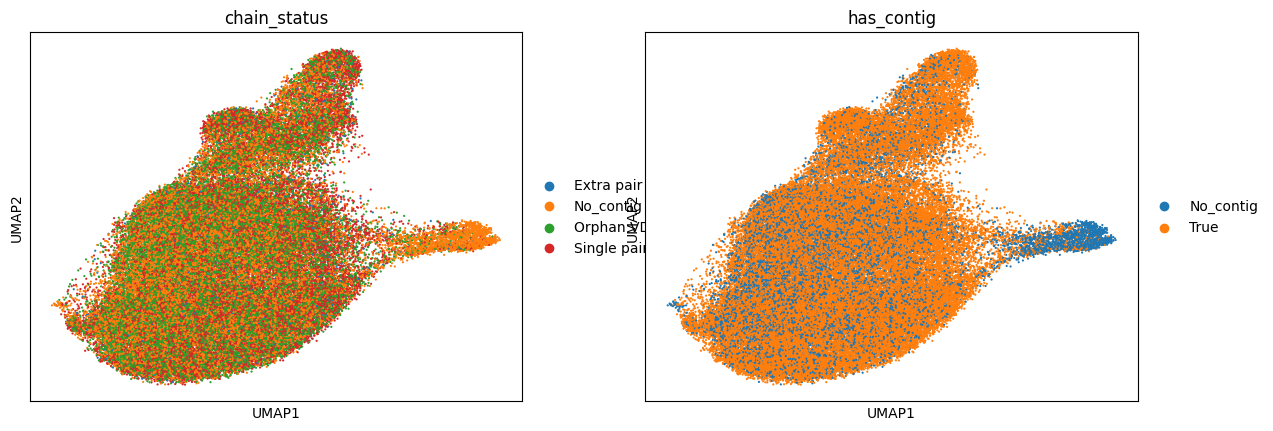

In [16]:
# For now, let’s take a look at the chain status (as gotten from the Dandelion object).

sc.pl.umap(adatax, color=["chain_status", "has_contig"], size = 10)

A core element of VDJ analysis is clonotype calling, roughly equivalent to clustering cells in GEX processing. Dandelion requires the clones it calls to have identical V and J genes, along with no more than 15% mismatches in the CDR3 sequences (common practice in BCR analysis).

For TCR clonotype calling, you can perform common practice nucleotide sequence identity by passing identity=1 and key="junction" to the function.

In [17]:
ddl.tl.find_clones(vdjx, identity = 1, key = 'junction')

Finding clones based on abT cell VDJ chains : 100%|██████████| 572/572 [00:02<00:00, 212.63it/s]
Refining clone assignment based on VJ chain pairing : 100%|██████████| 48526/48526 [00:00<00:00, 648309.24it/s]


We can compute a graph based on Levenshtein distance of the complete contig sequence. A NetworkX representation of it is now saved in vdj.graph.

The 10x-provided AIRR file is missing columns like sequence_alignment and sequence_alignment_aa so we will use the next best thing, which is sequence or sequence_aa. Note that these columns are not-gapped.

Specify key = 'sequence_aa' to toggle this behavior. Can also try junction or junction_aa if just want to visualise the CDR3 linkage.

In [18]:
#ddl.tl.generate_network(vdjx, key = 'sequence_aa')
## # if this step crashes, it may be because you need more memory... need to it on HPC? 

Since we now know what our clonotype calls are, we can quantify clonal expansion. It’s possible to cap this at a desired maximum clonotype size.

In [19]:
ddl.tl.clone_size(vdjx)
# this makes an independent column with the provided max_size in its name
# ddl.tl.clone_size (vdjx, max_size = 3)

Now that our Dandelion object has analysis information inside it, we can copy it over to the Scanpy object to have access to it there. The graph gets turned into the Scanpy standard forms of .obsp['vdj_distances'] and .obsp['vdj_connectivites'] for potential downstream use.

In [20]:
vdjx.update_plus()  
# The .metadata slot in Dandelion class automatically initializes whenever the .data slot is filled. However, it only returns a standard number of columns that are pre-specified. To retrieve other columns from the .data slot, we can update the metadata with ddl.update_metadata and specify the options retrieve and retrieve_mode.
# There is a new sub-function - update_plus() that will try and retrieve frequently used columns such as np1_length, np2_length
vdjx

Dandelion class object with n_obs = 48526 and n_contigs = 76003
    data: 'cell_id', 'sequence_id', 'sequence', 'sequence_aa', 'productive', 'complete_vdj', 'vj_in_frame', 'junction', 'junction_aa', 'locus', 'v_call', 'j_call', 'c_call', 'd_call', 'consensus_count', 'duplicate_count', 'cdr3_start', 'cdr3_end', 'fwr1_start', 'fwr1_end', 'fwr1', 'fwr1_aa', 'cdr1_start', 'cdr1_end', 'cdr1', 'cdr1_aa', 'fwr2_start', 'fwr2_end', 'fwr2', 'fwr2_aa', 'cdr2_start', 'cdr2_end', 'cdr2', 'cdr2_aa', 'fwr3_start', 'fwr3_end', 'fwr3', 'fwr3_aa', 'fwr4_start', 'fwr4_end', 'fwr4', 'fwr4_aa', 'clone_id', 'raw_consensus_id_10x', 'exact_subclonotype_id_10x', 'high_confidence_10x', 'filtered_10x', 'is_cell_10x', 'is_asm_cell_10x', 'rearrangement_status'
    metadata: 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junct

In [21]:
vdjx.metadata

clone_id clone_id_by_size locus_VDJ  \
CD4_L01_AAACCTGAGGCAGTCA-1    abT_563_2_11_829_2_2             4003       TRB   
CD4_L01_AAACCTGAGTCAAGCG-1  abT_370_4_135_1551_3_2            36211       TRB   
CD4_L01_AAACCTGAGTCCTCCT-1     abT_35_2_45_861_4_2            28865       TRB   
CD4_L01_AAACCTGCAAGACGTG-1             abT_182_4_3            28866       TRB   
CD4_L01_AAACCTGCACAAGTAA-1     abT_39_4_34_211_1_1            28867       TRB   
...                                            ...              ...       ...   
V_DP_TTTGGTTAGCCAACAG-1                abT_36_7_10              122       TRB   
V_DP_TTTGGTTTCCCATTTA-1       abT_126_2_15_468_3_8            14969       TRB   
V_DP_TTTGGTTTCTTGTCAT-1       abT_277_3_30_411_3_1            42821       TRB   
V_DP_TTTGTCACAAGTAGTA-1               abT_120_3_19                6       TRB   
V_DP_TTTGTCACACAAGCCC-1                abT_64_3_13              322       TRB   

                           locus_VJ productive_VDJ productive_VJ v_call_VDJ  \
CD4_L01_AAACCTGAGGCAGTCA-1      TRA           True          True    TRBV6-1   
CD4_L01_AAACCTGAGTCAAGCG-1      TRA           True          True   TRBV20-1   
CD4_L01_AAACCTGAGTCCTCCT-1      TRA           True          True   TRBV20-1   
CD4_L01_AAACCTGCAAGACGTG-1     None           True          None    TRBV4-2   
CD4_L01_AAACCTGCACAAGTAA-1      TRA           True          True    TRBV3-1   
...                             ...            ...           ...        ...   
V_DP_TTTGGTTAGCCAACAG-1        None           True          None    TRBV7-9   
V_DP_TTTGGTTTCCCATTTA-1         TRA           True          True   TRBV12-4   
V_DP_TTTGGTTTCTTGTCAT-1         TRA           True          True     TRBV19   
V_DP_TTTGTCACAAGTAGTA-1        None           True          None     TRBV19   
V_DP_TTTGTCACACAAGCCC-1        None           True          None    TRBV5-1   

                           d_call_VDJ j_call_VDJ     v_call_VJ  ...  \
CD4_L01_AAACCTGAGGCAGTCA-1       None    TRBJ2-1  TRAV38-2/DV8  ...   
CD4_L01_AAACCTGAGTCAAGCG-1       None    TRBJ2-7    TRAV23/DV6  ...   
CD4_L01_AAACCTGAGTCCTCCT-1       None    TRBJ1-2       TRAV9-2  ...   
CD4_L01_AAACCTGCAAGACGTG-1      TRBD1    TRBJ1-5          None  ...   
CD4_L01_AAACCTGCACAAGTAA-1       None    TRBJ2-7       TRAV8-1  ...   
...                               ...        ...           ...  ...   
V_DP_TTTGGTTAGCCAACAG-1          None    TRBJ2-2          None  ...   
V_DP_TTTGGTTTCCCATTTA-1          None    TRBJ1-1      TRAV12-1  ...   
V_DP_TTTGGTTTCTTGTCAT-1          None    TRBJ2-2        TRAV35  ...   
V_DP_TTTGTCACAAGTAGTA-1         TRBD1    TRBJ2-3          None  ...   
V_DP_TTTGTCACACAAGCCC-1          None    TRBJ2-7          None  ...   

                           v_call_abT_VDJ_main d_call_abT_VDJ_main  \
CD4_L01_AAACCTGAGGCAGTCA-1             TRBV6-1                None   
CD4_L01_AAACCTGAGTCAAGCG-1            TRBV20-1                None   
CD4_L01_AAACCTGAGTCCTCCT-1            TRBV20-1                None   
CD4_L01_AAACCTGCAAGACGTG-1             TRBV4-2               TRBD1   
CD4_L01_AAACCTGCACAAGTAA-1             TRBV3-1                None   
...                                        ...                 ...   
V_DP_TTTGGTTAGCCAACAG-1                TRBV7-9                None   
V_DP_TTTGGTTTCCCATTTA-1               TRBV12-4                None   
V_DP_TTTGGTTTCTTGTCAT-1                 TRBV19                None   
V_DP_TTTGTCACAAGTAGTA-1                 TRBV19               TRBD1   
V_DP_TTTGTCACACAAGCCC-1                TRBV5-1                None   

                           j_call_abT_VDJ_main v_call_abT_VJ_main  \
CD4_L01_AAACCTGAGGCAGTCA-1             TRBJ2-1       TRAV38-2/DV8   
CD4_L01_AAACCTGAGTCAAGCG-1             TRBJ2-7         TRAV23/DV6   
CD4_L01_AAACCTGAGTCCTCCT-1             TRBJ1-2            TRAV9-2   
CD4_L01_AAACCTGCAAGACGTG-1             TRBJ1-5               None   
CD4_L01_AAACCTGCACAAGTAA-1             TRBJ2-7            TRAV8-1   
...         

In [22]:
# do the actual transfer
ddl.tl.transfer(adatax, vdjx, overwrite = True)

In [23]:
# check..
adatax

AnnData object with n_obs × n_vars = 71564 × 2285
    obs: 'sample', 'sort_type', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'batch', 'CD4/CD8_geneset', 'leiden', 'celltypist_majority_voting', 'celltypist_annotation', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig', 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VD

In [24]:
vdjx

Dandelion class object with n_obs = 48526 and n_contigs = 76003
    data: 'cell_id', 'sequence_id', 'sequence', 'sequence_aa', 'productive', 'complete_vdj', 'vj_in_frame', 'junction', 'junction_aa', 'locus', 'v_call', 'j_call', 'c_call', 'd_call', 'consensus_count', 'duplicate_count', 'cdr3_start', 'cdr3_end', 'fwr1_start', 'fwr1_end', 'fwr1', 'fwr1_aa', 'cdr1_start', 'cdr1_end', 'cdr1', 'cdr1_aa', 'fwr2_start', 'fwr2_end', 'fwr2', 'fwr2_aa', 'cdr2_start', 'cdr2_end', 'cdr2', 'cdr2_aa', 'fwr3_start', 'fwr3_end', 'fwr3', 'fwr3_aa', 'fwr4_start', 'fwr4_end', 'fwr4', 'fwr4_aa', 'clone_id', 'raw_consensus_id_10x', 'exact_subclonotype_id_10x', 'high_confidence_10x', 'filtered_10x', 'is_cell_10x', 'is_asm_cell_10x', 'rearrangement_status'
    metadata: 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junct

In [25]:
adatax.obs['clone_id']

CD4_L01_AAACCTGAGAGCTATA-1                 No_contig
CD4_L01_AAACCTGAGGAGCGAG-1                 No_contig
CD4_L01_AAACCTGAGGCAGTCA-1      abT_563_2_11_829_2_2
CD4_L01_AAACCTGAGTCAAGCG-1    abT_370_4_135_1551_3_2
CD4_L01_AAACCTGAGTCCTCCT-1       abT_35_2_45_861_4_2
                                       ...          
V_DP_TTTGTCACATATGGTC-1                    No_contig
V_DP_TTTGTCACATGGTAGG-1                    No_contig
V_DP_TTTGTCATCCTTGCCA-1                    No_contig
V_DP_TTTGTCATCGCCATAA-1                    No_contig
V_DP_TTTGTCATCTTGTTTG-1                    No_contig
Name: clone_id, Length: 71564, dtype: object

## Saving this raw object

In [25]:
#vdjx.write_h5ddl("adata_tcr_checked_MS_120923.h5ddl")
#adatax.write_h5ad("adata_processed_v2_tcr_MS_120923.h5ad")

vdjx.write_h5ddl("adata_tcr_checked_MS_250923.h5ddl")
adatax.write_h5ad("adata_processed_v2_tcr_MS_250923.h5ad")

### checking out some analysis

In [26]:
adatax = sc.read_h5ad("/Users/uqssoon/Documents/Projects/Jaz-project/Output_MS/objects/adata_processed_v2_tcr_MS_250923.h5ad")

In [33]:
### Note: cannot run this as we have no network generated just yet 
# ddl.pl.clone_network(adatax, color="clone_id_size")

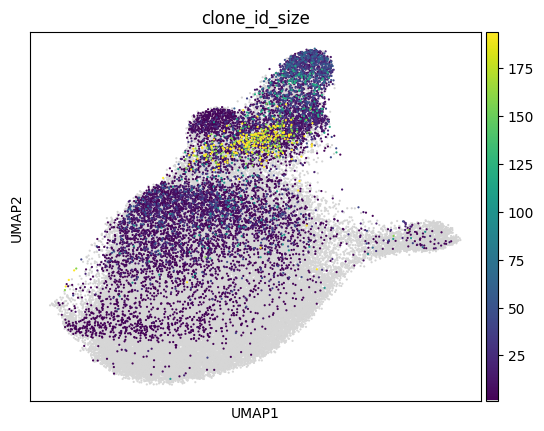

In [27]:
import tools

sc.pl.umap(adatax, color= ['clone_id_size'], color_map = tools.cmp(), size = 10)

In [28]:
ddl.tl.clone_size (vdjx)

In [29]:
# To remove any of the clone size 0 which are orphan chains, we can run this: 
ddl.tl.clone_size (vdjx, max_size = 3)
vdjx.update_plus()  
ddl.tl.transfer(adatax, vdjx, overwrite= True)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


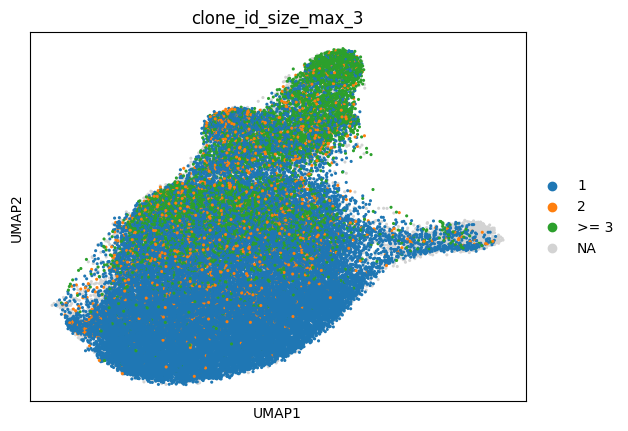

In [30]:
sc.pl.umap(adatax, color="clone_id_size_max_3", size = 20)

In [31]:
#### If you have done up scanpy's plotting defaults, you can reset it before going forward further.

import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline


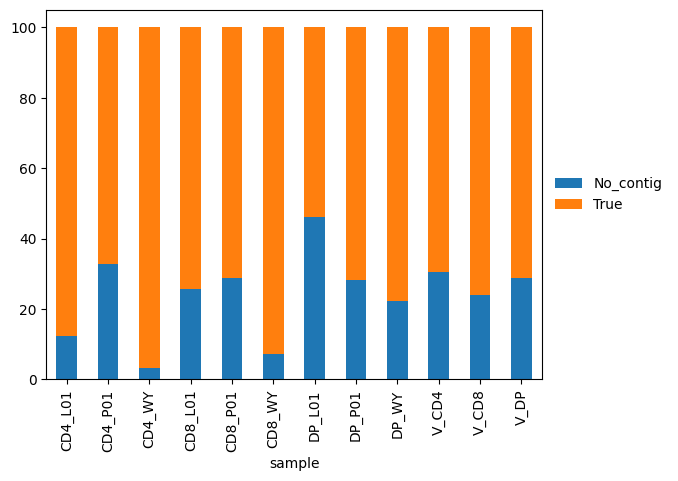

In [32]:
pd.crosstab(
    adatax.obs["sample"],
    adatax.obs["has_contig"],
).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)


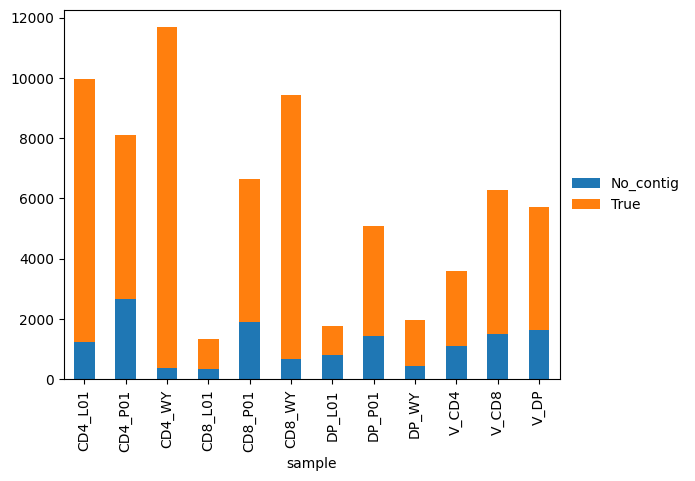

In [33]:
pd.crosstab(
    adatax.obs["sample"],
    adatax.obs["has_contig"],
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

<Axes: xlabel='True'>

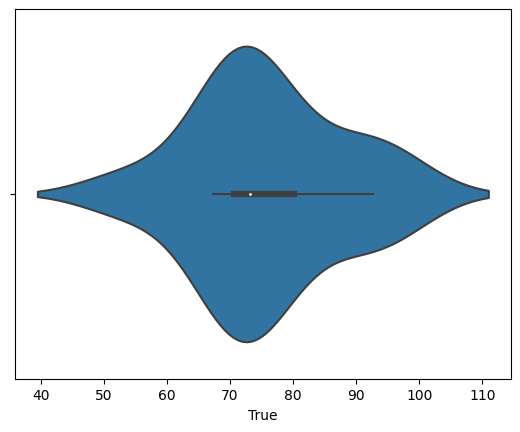

In [34]:
import seaborn as sns

df = pd.crosstab(
    adatax.obs["sample"],
    adatax.obs["has_contig"],
).apply(lambda r: r / r.sum() * 100, axis=1)

sns.violinplot(data=df, x="True")

In [35]:
vdjx.metadata

clone_id clone_id_by_size locus_VDJ  \
CD4_L01_AAACCTGAGGCAGTCA-1    abT_563_2_11_829_2_2             4003       TRB   
CD4_L01_AAACCTGAGTCAAGCG-1  abT_370_4_135_1551_3_2            36211       TRB   
CD4_L01_AAACCTGAGTCCTCCT-1     abT_35_2_45_861_4_2            28865       TRB   
CD4_L01_AAACCTGCAAGACGTG-1             abT_182_4_3            28866       TRB   
CD4_L01_AAACCTGCACAAGTAA-1     abT_39_4_34_211_1_1            28867       TRB   
...                                            ...              ...       ...   
V_DP_TTTGGTTAGCCAACAG-1                abT_36_7_10              122       TRB   
V_DP_TTTGGTTTCCCATTTA-1       abT_126_2_15_468_3_8            14969       TRB   
V_DP_TTTGGTTTCTTGTCAT-1       abT_277_3_30_411_3_1            42821       TRB   
V_DP_TTTGTCACAAGTAGTA-1               abT_120_3_19                6       TRB   
V_DP_TTTGTCACACAAGCCC-1                abT_64_3_13              322       TRB   

                           locus_VJ productive_VDJ productive_VJ v_call_VDJ  \
CD4_L01_AAACCTGAGGCAGTCA-1      TRA           True          True    TRBV6-1   
CD4_L01_AAACCTGAGTCAAGCG-1      TRA           True          True   TRBV20-1   
CD4_L01_AAACCTGAGTCCTCCT-1      TRA           True          True   TRBV20-1   
CD4_L01_AAACCTGCAAGACGTG-1     None           True          None    TRBV4-2   
CD4_L01_AAACCTGCACAAGTAA-1      TRA           True          True    TRBV3-1   
...                             ...            ...           ...        ...   
V_DP_TTTGGTTAGCCAACAG-1        None           True          None    TRBV7-9   
V_DP_TTTGGTTTCCCATTTA-1         TRA           True          True   TRBV12-4   
V_DP_TTTGGTTTCTTGTCAT-1         TRA           True          True     TRBV19   
V_DP_TTTGTCACAAGTAGTA-1        None           True          None     TRBV19   
V_DP_TTTGTCACACAAGCCC-1        None           True          None    TRBV5-1   

                           d_call_VDJ j_call_VDJ     v_call_VJ  ...  \
CD4_L01_AAACCTGAGGCAGTCA-1       None    TRBJ2-1  TRAV38-2/DV8  ...   
CD4_L01_AAACCTGAGTCAAGCG-1       None    TRBJ2-7    TRAV23/DV6  ...   
CD4_L01_AAACCTGAGTCCTCCT-1       None    TRBJ1-2       TRAV9-2  ...   
CD4_L01_AAACCTGCAAGACGTG-1      TRBD1    TRBJ1-5          None  ...   
CD4_L01_AAACCTGCACAAGTAA-1       None    TRBJ2-7       TRAV8-1  ...   
...                               ...        ...           ...  ...   
V_DP_TTTGGTTAGCCAACAG-1          None    TRBJ2-2          None  ...   
V_DP_TTTGGTTTCCCATTTA-1          None    TRBJ1-1      TRAV12-1  ...   
V_DP_TTTGGTTTCTTGTCAT-1          None    TRBJ2-2        TRAV35  ...   
V_DP_TTTGTCACAAGTAGTA-1         TRBD1    TRBJ2-3          None  ...   
V_DP_TTTGTCACACAAGCCC-1          None    TRBJ2-7          None  ...   

                           d_call_abT_VDJ_main j_call_abT_VDJ_main  \
CD4_L01_AAACCTGAGGCAGTCA-1                None             TRBJ2-1   
CD4_L01_AAACCTGAGTCAAGCG-1                None             TRBJ2-7   
CD4_L01_AAACCTGAGTCCTCCT-1                None             TRBJ1-2   
CD4_L01_AAACCTGCAAGACGTG-1               TRBD1             TRBJ1-5   
CD4_L01_AAACCTGCACAAGTAA-1                None             TRBJ2-7   
...                                        ...                 ...   
V_DP_TTTGGTTAGCCAACAG-1                   None             TRBJ2-2   
V_DP_TTTGGTTTCCCATTTA-1                   None             TRBJ1-1   
V_DP_TTTGGTTTCTTGTCAT-1                   None             TRBJ2-2   
V_DP_TTTGTCACAAGTAGTA-1                  TRBD1             TRBJ2-3   
V_DP_TTTGTCACACAAGCCC-1                   None             TRBJ2-7   

                           v_call_abT_VJ_main j_call_abT_VJ_main locus_status  \
CD4_L01_AAACCTGAGGCAGTCA-1       TRAV38-2/DV8             TRAJ47    TRB + TRA   
CD4_L01_AAACCTGAGTCAAGCG-1         TRAV23/DV6             TRAJ15    TRB + TRA   
CD4_L01_AAACCTGAGTCCTCCT-1            TRAV9-2             TRAJ35    TRB + TRA   
CD4_L01_AAACCTGCAAGACGTG-1               None               None   Orphan TRB   
CD4_L01_AAACCTGCACAAG

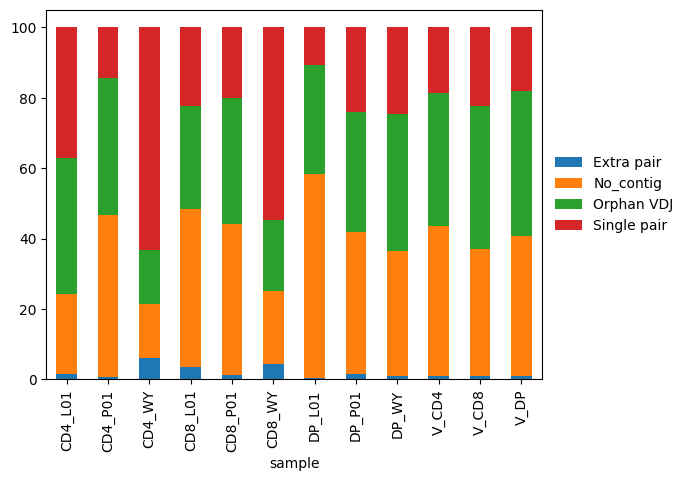

In [36]:
pd.crosstab(
    adatax.obs["sample"],
    adatax.obs["chain_status"],
).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

Another common VDJ analysis request is to examine the distribution of shared clonotypes between cells of different metadata groups. Dandelion can do this as a circos plot.

In [37]:
#ddl.tl.clone_overlap(
#    adatax, groupby="celltypist_annotation", colorby="celltypist_annotation", weighted_overlap=True
#)

ddl.tl.clone_overlap(
    adatax, groupby="celltypist_annotation", weighted_overlap=True
)

In [38]:
adatax.uns['clone_overlap']

DP  MAIT cells  Regulatory T cells  \
abT_100_1_1_833_4_6   0           0                   0   
abT_100_1_2           0           0                   1   
abT_100_1_3           6           0                   0   
abT_100_1_4           0           0                   0   
abT_100_1_5           0           0                   0   
...                  ..         ...                 ...   
abT_9_7_8_791_2_5     0           0                   0   
abT_9_8_1             1           0                   0   
abT_9_8_2             0           0                   0   
abT_9_8_3             0           0                   0   
abT_9_9_1             0           0                   0   

                     Tcm/Naive cytotoxic T cells  Tcm/Naive helper T cells  \
abT_100_1_1_833_4_6                            0                         1   
abT_100_1_2                                    0                         0   
abT_100_1_3                                    0                         0   
abT_100_1_4                                    1                         0   
abT_100_1_5                                    0                         1   
...                                          ...                       ...   
abT_9_7_8_791_2_5                              0                         1   
abT_9_8_1                                      0                         0   
abT_9_8_2                                      1                         0   
abT_9_8_3                                      0                         1   
abT_9_9_1                                      1                         0   

                     Tem/Effector helper T cells  Tem/Temra cytotoxic T cells  \
abT_100_1_1_833_4_6                            0                            0   
abT_100_1_2                                    0                            0   
abT_100_1_3                                    0                            0   
abT_100_1_4                                    0                            0   
abT_100_1_5                                    0                            0   
...                                          ...                          ...   
abT_9_7_8_791_2_5                              0                            0   
abT_9_8_1                                      0                            0   
abT_9_8_2                                      0                            0   
abT_9_8_3                                      0                            0   
abT_9_9_1                                      0                            0   

                     Tem/Trm cytotoxic T cells  
abT_100_1_1_833_4_6                          0  
abT_100_1_2                                  0  
abT_100_1_3                                  0  
abT_100_1_4                                  0  
abT_100_1_5                                  0  
...                                        ...  
abT_9_7_8_791_2_5                            0  
abT_9_8_1                                    0  
abT_9_8_2                                    0  
abT_9_8_3                                    0  
abT_9_9_1                                    0  

[42821 rows x 8 columns]

In [39]:
adatax.obs.clone_id

CD4_L01_AAACCTGAGAGCTATA-1                 No_contig
CD4_L01_AAACCTGAGGAGCGAG-1                 No_contig
CD4_L01_AAACCTGAGGCAGTCA-1      abT_563_2_11_829_2_2
CD4_L01_AAACCTGAGTCAAGCG-1    abT_370_4_135_1551_3_2
CD4_L01_AAACCTGAGTCCTCCT-1       abT_35_2_45_861_4_2
                                       ...          
V_DP_TTTGTCACATATGGTC-1                    No_contig
V_DP_TTTGTCACATGGTAGG-1                    No_contig
V_DP_TTTGTCATCCTTGCCA-1                    No_contig
V_DP_TTTGTCATCGCCATAA-1                    No_contig
V_DP_TTTGTCATCTTGTTTG-1                    No_contig
Name: clone_id, Length: 71564, dtype: category
Categories (41491, object): ['No_contig', 'abT_1_1_1_1034_4_1', 'abT_1_1_2_1582_4_1', 'abT_1_1_3', ..., 'abT_572_8_5_1674_5_3', 'abT_572_9_1_1552_2_2', 'abT_572_9_2_1875_4_2', 'abT_572_9_3_1014_4_6']

In [40]:
pd.crosstab(adatax.obs['celltypist_annotation'], adatax.obs['clone_id'])

clone_id                     No_contig  abT_1_1_1_1034_4_1  \
celltypist_annotation                                        
DP                                6053                   0   
MAIT cells                         777                   0   
Regulatory T cells                 114                   0   
Tcm/Naive cytotoxic T cells       2326                   0   
Tcm/Naive helper T cells         11363                   1   
Tem/Effector helper T cells        318                   0   
Tem/Temra cytotoxic T cells        776                   0   
Tem/Trm cytotoxic T cells         1311                   0   

clone_id                     abT_1_1_2_1582_4_1  abT_1_1_3  abT_1_1_4  \
celltypist_annotation                                                   
DP                                            0          0          0   
MAIT cells                                    0          0          2   
Regulatory T cells                            0          0          0   
Tcm/Naive cytotoxic T cells                   0          0          0   
Tcm/Naive helper T cells                      1          1          0   
Tem/Effector helper T cells                   0          0          0   
Tem/Temra cytotoxic T cells                   0          0          0   
Tem/Trm cytotoxic T cells                     0          0          0   

clone_id                     abT_1_1_5_686_3_2  abT_1_1_6  abT_1_1_7  \
celltypist_annotation                                                  
DP                                           0          0          0   
MAIT cells                                   0          0          0   
Regulatory T cells                           0          0          0   
Tcm/Naive cytotoxic T cells                  0          0          0   
Tcm/Naive helper T cells                     1          1          1   
Tem/Effector helper T cells                  0          0          0   
Tem/Temra cytotoxic T cells                  0          0          0   
Tem/Trm cytotoxic T cells                    0          0          0   

clone_id                     abT_1_1_8_1331_3_5  abT_1_1_9  ...  \
celltypist_annotation                                       ...   
DP                                            0          1  ...   
MAIT cells                                    0          0  ...   
Regulatory T cells                            0          0  ...   
Tcm/Naive cytotoxic T cells                   0          0  ...   
Tcm/Naive helper T cells                      1          0  ...   
Tem/Effector helper T cells                   0          0  ...   
Tem/Temra cytotoxic T cells                   0          0  ...   
Tem/Trm cytotoxic T cells                     0          0  ...   

clone_id                     abT_572_7_17_1260_1_1  abT_572_8_1_1864_1_1  \
celltypist_annotation                                                      
DP                                               0                     0   
MAIT cells                                       0                     0   
Regulatory T cells                               0                     0   
Tcm/Naive cytotoxic T cells                      0                     1   
Tcm/Naive helper T cells                         1                     0   
Tem/Effector helper T cells                      0                     0   
Tem/Temra cytotoxic T cells                      0                     0   
Tem/Trm cytotoxic T cells                        0                     0   

clone_id                     abT_572_8_2  abT_572_8_2_994_4_1  \
celltypist_annotation                                           
DP                                     0                    0   
MAIT cells                             0                    0   
Regulatory T cells                     0                    0   
Tcm/Naive cytotoxic T cells            0                    0   
Tcm/Naive helper T cells               1                    1   
Tem/Effector helper T cells            0

In [41]:
vdjx.metadata

clone_id clone_id_by_size locus_VDJ  \
CD4_L01_AAACCTGAGGCAGTCA-1    abT_563_2_11_829_2_2             4003       TRB   
CD4_L01_AAACCTGAGTCAAGCG-1  abT_370_4_135_1551_3_2            36211       TRB   
CD4_L01_AAACCTGAGTCCTCCT-1     abT_35_2_45_861_4_2            28865       TRB   
CD4_L01_AAACCTGCAAGACGTG-1             abT_182_4_3            28866       TRB   
CD4_L01_AAACCTGCACAAGTAA-1     abT_39_4_34_211_1_1            28867       TRB   
...                                            ...              ...       ...   
V_DP_TTTGGTTAGCCAACAG-1                abT_36_7_10              122       TRB   
V_DP_TTTGGTTTCCCATTTA-1       abT_126_2_15_468_3_8            14969       TRB   
V_DP_TTTGGTTTCTTGTCAT-1       abT_277_3_30_411_3_1            42821       TRB   
V_DP_TTTGTCACAAGTAGTA-1               abT_120_3_19                6       TRB   
V_DP_TTTGTCACACAAGCCC-1                abT_64_3_13              322       TRB   

                           locus_VJ productive_VDJ productive_VJ v_call_VDJ  \
CD4_L01_AAACCTGAGGCAGTCA-1      TRA           True          True    TRBV6-1   
CD4_L01_AAACCTGAGTCAAGCG-1      TRA           True          True   TRBV20-1   
CD4_L01_AAACCTGAGTCCTCCT-1      TRA           True          True   TRBV20-1   
CD4_L01_AAACCTGCAAGACGTG-1     None           True          None    TRBV4-2   
CD4_L01_AAACCTGCACAAGTAA-1      TRA           True          True    TRBV3-1   
...                             ...            ...           ...        ...   
V_DP_TTTGGTTAGCCAACAG-1        None           True          None    TRBV7-9   
V_DP_TTTGGTTTCCCATTTA-1         TRA           True          True   TRBV12-4   
V_DP_TTTGGTTTCTTGTCAT-1         TRA           True          True     TRBV19   
V_DP_TTTGTCACAAGTAGTA-1        None           True          None     TRBV19   
V_DP_TTTGTCACACAAGCCC-1        None           True          None    TRBV5-1   

                           d_call_VDJ j_call_VDJ     v_call_VJ  ...  \
CD4_L01_AAACCTGAGGCAGTCA-1       None    TRBJ2-1  TRAV38-2/DV8  ...   
CD4_L01_AAACCTGAGTCAAGCG-1       None    TRBJ2-7    TRAV23/DV6  ...   
CD4_L01_AAACCTGAGTCCTCCT-1       None    TRBJ1-2       TRAV9-2  ...   
CD4_L01_AAACCTGCAAGACGTG-1      TRBD1    TRBJ1-5          None  ...   
CD4_L01_AAACCTGCACAAGTAA-1       None    TRBJ2-7       TRAV8-1  ...   
...                               ...        ...           ...  ...   
V_DP_TTTGGTTAGCCAACAG-1          None    TRBJ2-2          None  ...   
V_DP_TTTGGTTTCCCATTTA-1          None    TRBJ1-1      TRAV12-1  ...   
V_DP_TTTGGTTTCTTGTCAT-1          None    TRBJ2-2        TRAV35  ...   
V_DP_TTTGTCACAAGTAGTA-1         TRBD1    TRBJ2-3          None  ...   
V_DP_TTTGTCACACAAGCCC-1          None    TRBJ2-7          None  ...   

                           d_call_abT_VDJ_main j_call_abT_VDJ_main  \
CD4_L01_AAACCTGAGGCAGTCA-1                None             TRBJ2-1   
CD4_L01_AAACCTGAGTCAAGCG-1                None             TRBJ2-7   
CD4_L01_AAACCTGAGTCCTCCT-1                None             TRBJ1-2   
CD4_L01_AAACCTGCAAGACGTG-1               TRBD1             TRBJ1-5   
CD4_L01_AAACCTGCACAAGTAA-1                None             TRBJ2-7   
...                                        ...                 ...   
V_DP_TTTGGTTAGCCAACAG-1                   None             TRBJ2-2   
V_DP_TTTGGTTTCCCATTTA-1                   None             TRBJ1-1   
V_DP_TTTGGTTTCTTGTCAT-1                   None             TRBJ2-2   
V_DP_TTTGTCACAAGTAGTA-1                  TRBD1             TRBJ2-3   
V_DP_TTTGTCACACAAGCCC-1                   None             TRBJ2-7   

                           v_call_abT_VJ_main j_call_abT_VJ_main locus_status  \
CD4_L01_AAACCTGAGGCAGTCA-1       TRAV38-2/DV8             TRAJ47    TRB + TRA   
CD4_L01_AAACCTGAGTCAAGCG-1         TRAV23/DV6             TRAJ15    TRB + TRA   
CD4_L01_AAACCTGAGTCCTCCT-1            TRAV9-2             TRAJ35    TRB + TRA   
CD4_L01_AAACCTGCAAGACGTG-1               None               None   Orphan TRB   
CD4_L01_AAACCTGCACAAG

In [42]:
pd.crosstab(vdjx.metadata['clone_id_size_max_3'], vdjx.metadata['clone_id'])

clone_id             abT_100_1_1_833_4_6  abT_100_1_2  abT_100_1_3  \
clone_id_size_max_3                                                  
1                                      1            1            0   
2                                      0            0            0   
>= 3                                   0            0            6   

clone_id             abT_100_1_4  abT_100_1_5  abT_100_2_1_1479_3_1  \
clone_id_size_max_3                                                   
1                              1            1                     1   
2                              0            0                     0   
>= 3                           0            0                     0   

clone_id             abT_100_2_2_1320_2_1  abT_100_2_3_1597_1_3  abT_100_2_4  \
clone_id_size_max_3                                                            
1                                       1                     0            1   
2                                       0                     2            0   
>= 3                                    0                     0            0   

clone_id             abT_100_2_5  ...  abT_9_7_3_1030_1_1  abT_9_7_4_1499_1_2  \
clone_id_size_max_3               ...                                           
1                              1  ...                   1                   1   
2                              0  ...                   0                   0   
>= 3                           0  ...                   0                   0   

clone_id             abT_9_7_5_114_1_1  abT_9_7_6_1789_3_4|abT_9_7_6_621_2_5  \
clone_id_size_max_3                                                            
1                                    1                                     1   
2                                    0                                     0   
>= 3                                 0                                     0   

clone_id             abT_9_7_7  abT_9_7_8_791_2_5  abT_9_8_1  abT_9_8_2  \
clone_id_size_max_3                                                       
1                            1                  1          1          1   
2                            0                  0          0          0   
>= 3                         0                  0          0          0   

clone_id             abT_9_8_3  abT_9_9_1  
clone_id_size_max_3                        
1                            1          1  
2                            0          0  
>= 3                         0          0  

[3 rows x 41490 columns]

In [43]:
pd.crosstab(adatax.obs['chain_status'], adatax.obs['celltypist_annotation'])

celltypist_annotation    DP  MAIT cells  Regulatory T cells  \
chain_status                                                  
Extra pair              153          76                  24   
No_contig              6053         777                 114   
Orphan VDJ             5377         656                 186   
Single pair            2933         956                 376   

celltypist_annotation  Tcm/Naive cytotoxic T cells  Tcm/Naive helper T cells  \
chain_status                                                                   
Extra pair                                     233                       923   
No_contig                                     2326                     11363   
Orphan VDJ                                    2887                     11503   
Single pair                                   3504                     13167   

celltypist_annotation  Tem/Effector helper T cells  \
chain_status                                         
Extra pair                                      41   
No_contig                                      318   
Orphan VDJ                                     349   
Single pair                                    490   

celltypist_annotation  Tem/Temra cytotoxic T cells  Tem/Trm cytotoxic T cells  
chain_status                                                                   
Extra pair                                      98                        140  
No_contig                                      776                       1311  
Orphan VDJ                                     578                       1226  
Single pair                                   1030                       1620

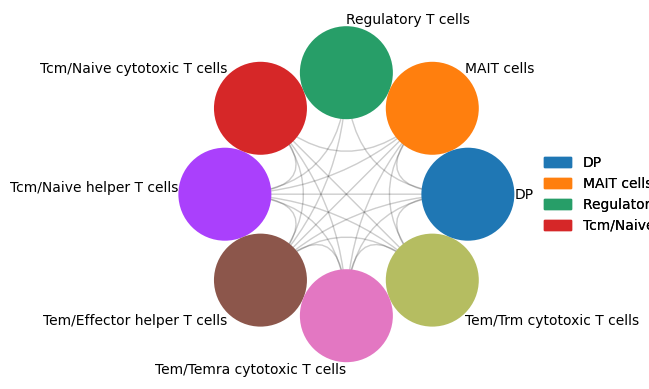

In [44]:
ddl.pl.clone_overlap(
    adatax, groupby="celltypist_annotation", colorby="celltypist_annotation", weighted_overlap=False
)
# something is wrong here... 

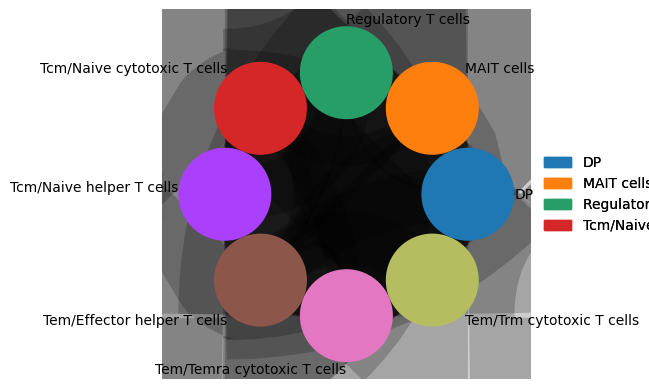

In [45]:
ddl.pl.clone_overlap(
    adatax, groupby="celltypist_annotation", colorby="celltypist_annotation", weighted_overlap=True
)

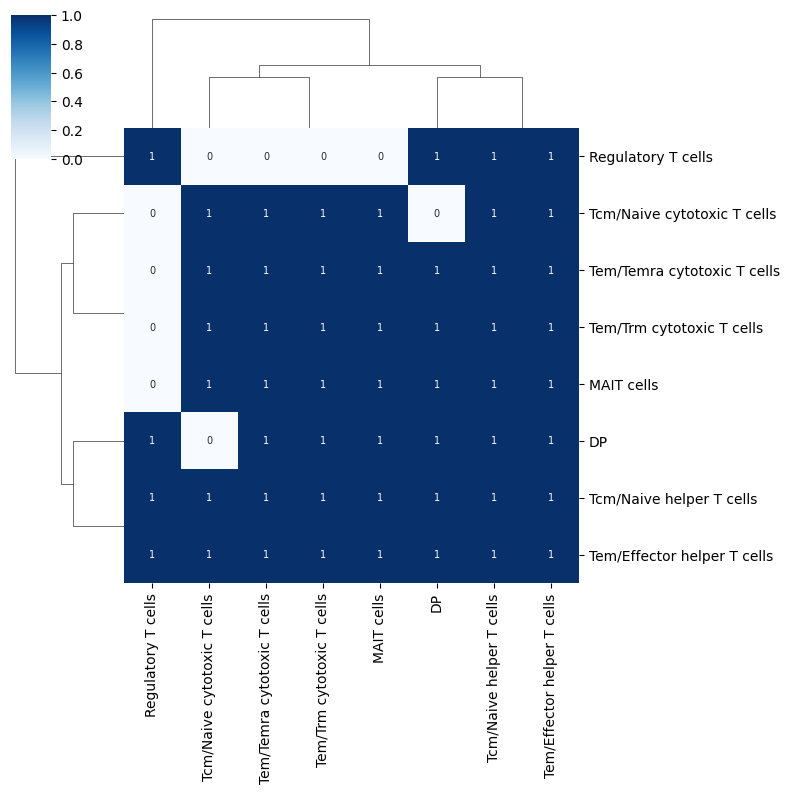

In [46]:
ddl.tl.clone_overlap(
    adatax, groupby="celltypist_annotation", weighted_overlap=False
)


ddl.pl.clone_overlap(
    adatax,
    groupby="celltypist_annotation",
    colorby="celltypist_annotation",
    weighted_overlap=False,
    as_heatmap=True,
    # seaborn clustermap kwargs
    cmap="Blues",
    annot=True,
    figsize=(8, 8),
    annot_kws={"size": 7},
)

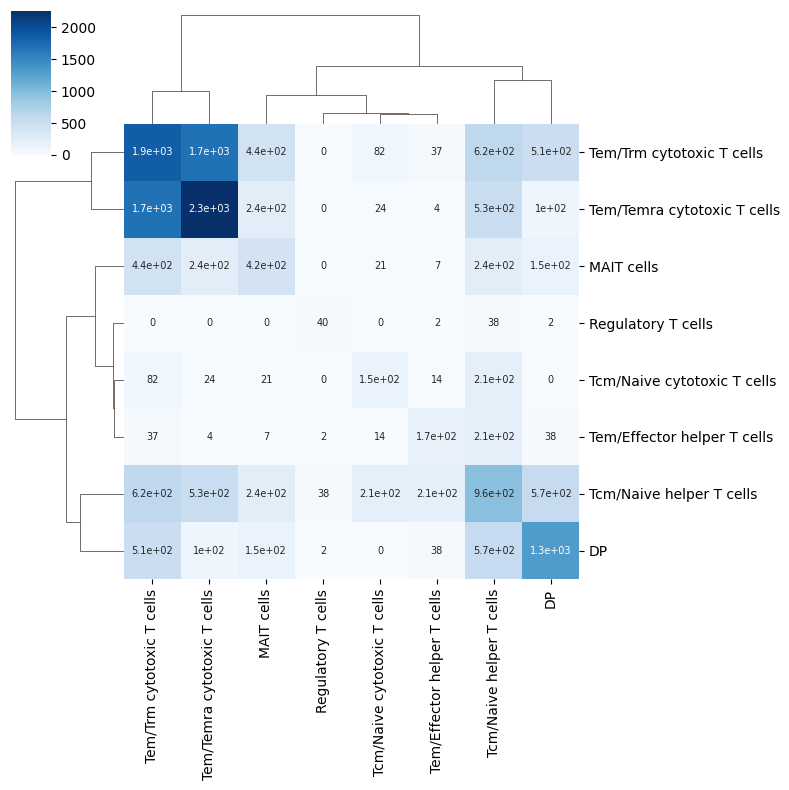

In [47]:
ddl.tl.clone_overlap(
    adatax, groupby="celltypist_annotation", weighted_overlap=True
)


ddl.pl.clone_overlap(
    adatax,
    groupby="celltypist_annotation",
    colorby="celltypist_annotation",
    weighted_overlap=True,
    as_heatmap=True,
    # seaborn clustermap kwargs
    cmap="Blues",
    annot=True,
    figsize=(8, 8),
    annot_kws={"size": 7},
)

In [48]:
adatax.obs['clone_id'].value_counts()

No_contig                23038
abT_92_3_5                 194
abT_92_3_5_1867_1_3        156
abT_161_3_4_1866_4_2       118
abT_560_2_51               101
                         ...  
abT_216_6_37                 1
abT_216_6_38_1789_1_1        1
abT_216_6_39_799_3_1         1
abT_216_6_40_1650_4_3        1
abT_275_7_2                  1
Name: clone_id, Length: 41491, dtype: int64

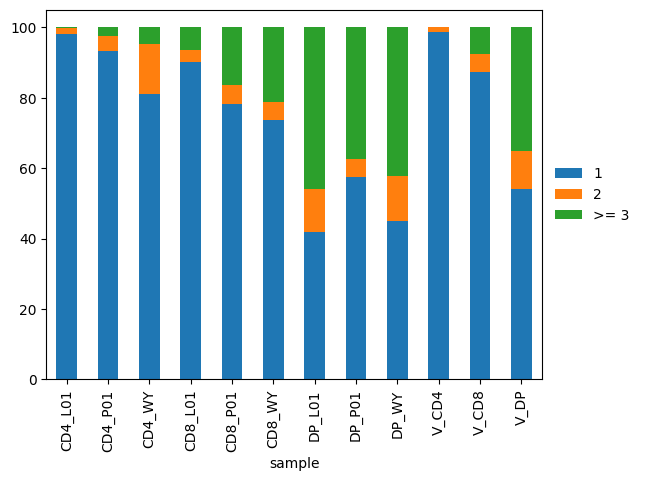

In [49]:
pd.crosstab(
    adatax.obs["sample"],
    adatax.obs["clone_id_size_max_3"],
).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)


If most are singletons, where do we get this perfect sharing???

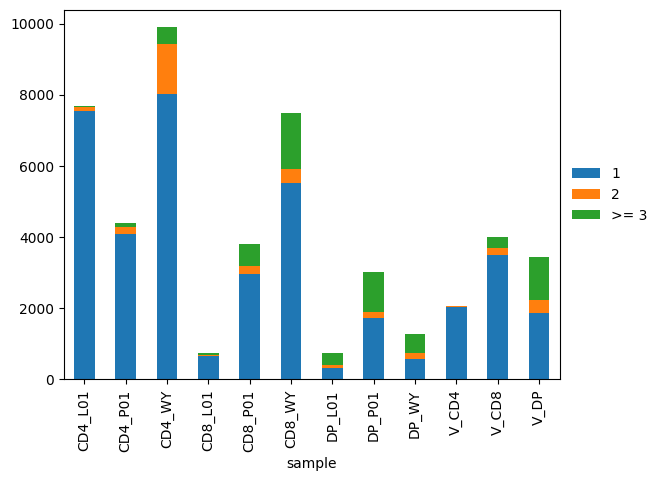

In [50]:
pd.crosstab(
    adatax.obs["sample"],
    adatax.obs["clone_id_size_max_3"],
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

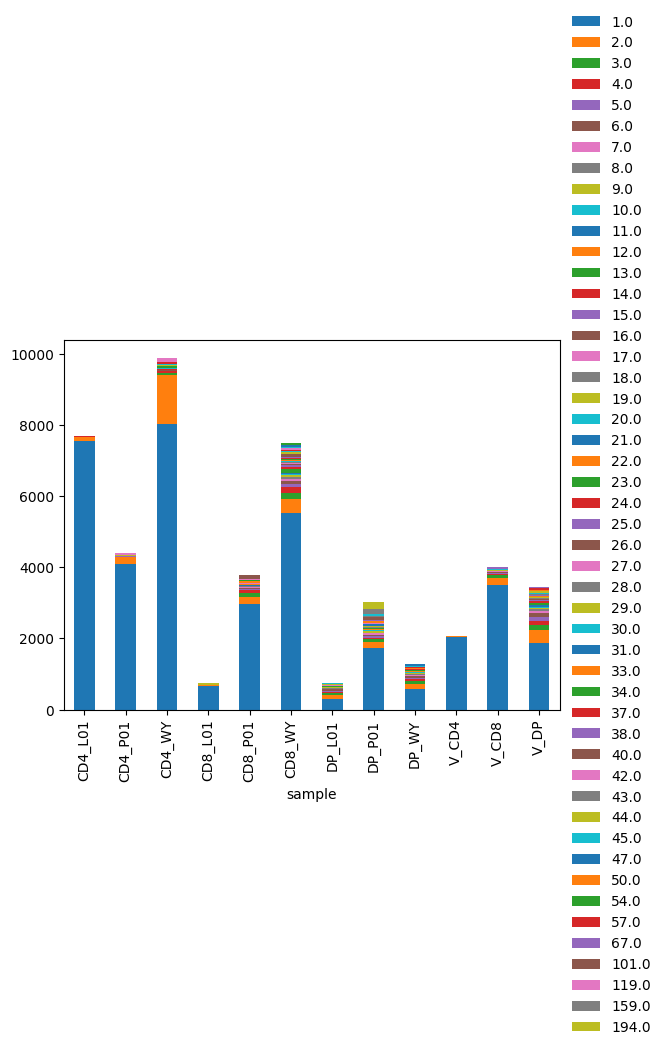

In [51]:
pd.crosstab(
    adatax.obs["sample"],
    adatax.obs["clone_id_size"],
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

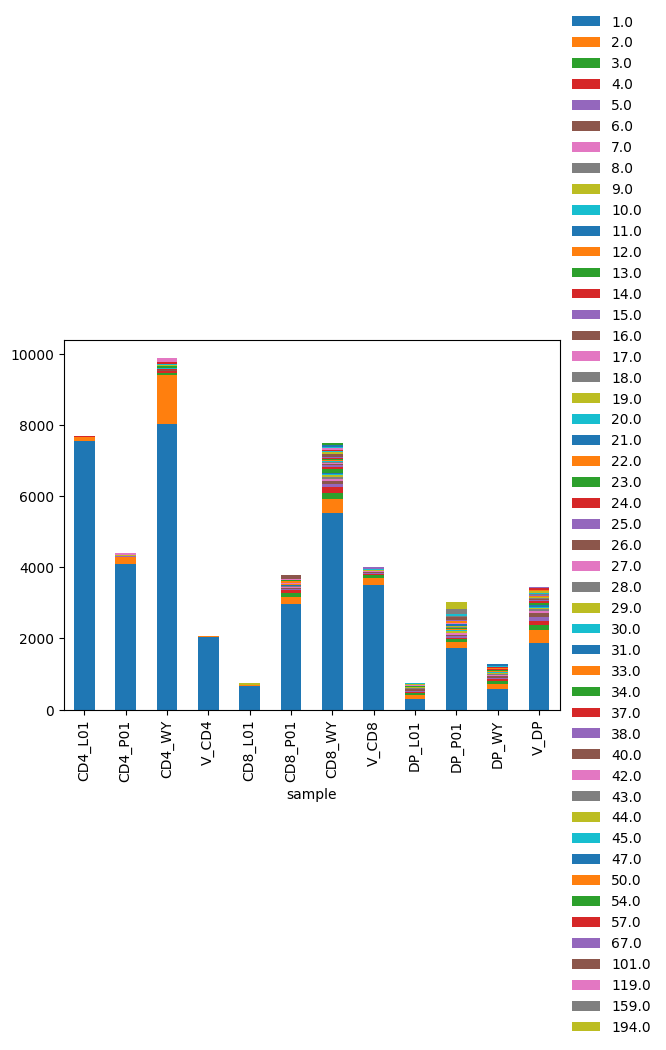

In [52]:
adatax2 = adatax.copy()
adatax2.obs["sample"] = adatax2.obs["sample"].cat.reorder_categories(["CD4_L01", "CD4_P01", "CD4_WY", "V_CD4","CD8_L01", "CD8_P01", "CD8_WY", "V_CD8","DP_L01", "DP_P01", "DP_WY", "V_DP",])
pd.crosstab(
    adatax2.obs["sample"],
    adatax2.obs["clone_id_size"],
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

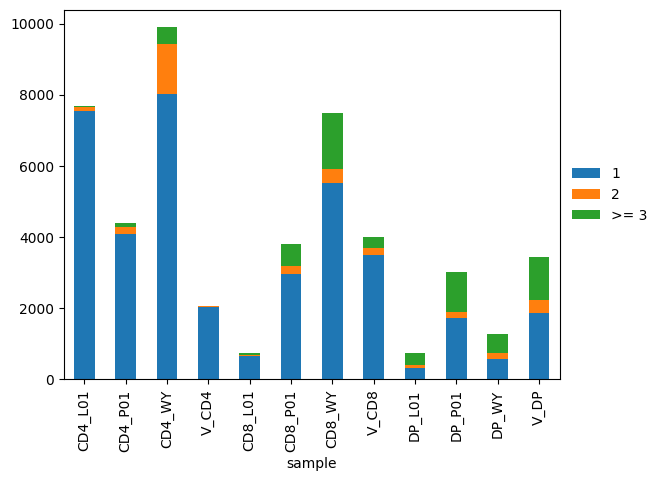

In [53]:
pd.crosstab(
    adatax2.obs["sample"],
    adatax2.obs["clone_id_size_max_3"],
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

In [ ]:
## too much sharing... 
# try to subset by donor and rerun find clone size etc... 

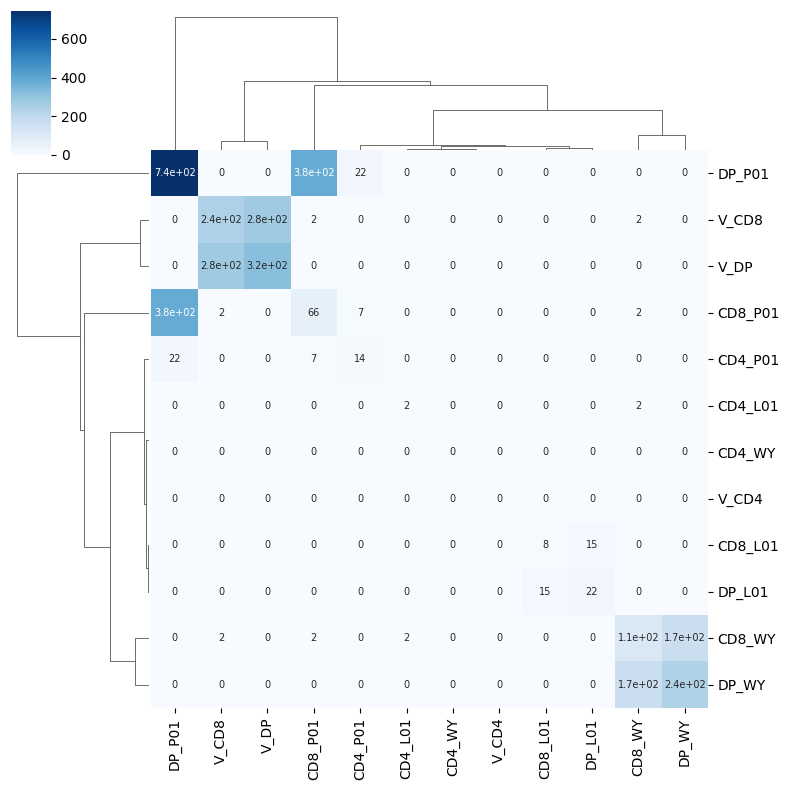

In [54]:
#### Try looking at clonal overlap between samples.. 
# for tl.clone_overlap + pl.clone_overlap, if you use weighted -both need to be weighted!
adatax2.obs["sample"] = adatax2.obs["sample"].cat.reorder_categories(["CD4_L01", "CD4_P01", "CD4_WY", "V_CD4","CD8_L01", "CD8_P01", "CD8_WY", "V_CD8","DP_L01", "DP_P01", "DP_WY", "V_DP",])
ddl.tl.clone_overlap(
    adatax2, groupby="sample", weighted_overlap=True
)

ddl.pl.clone_overlap(
    adatax2,
    groupby="sample",
    #colorby="celltypist_annotation",
    weighted_overlap=True,
    as_heatmap=True,
    # seaborn clustermap kwargs
    cmap="Blues",
    annot=True,
    figsize=(8, 8),
    annot_kws={"size": 7},
)

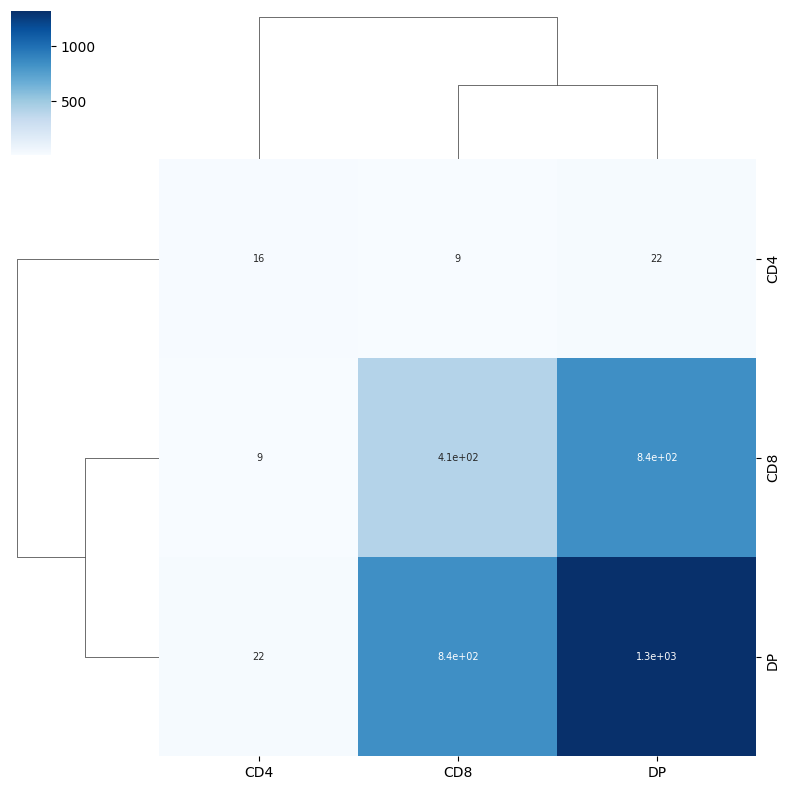

In [64]:
## CELLTYPE 
ddl.tl.clone_overlap(
    adatax2, groupby="sort_type", weighted_overlap=True
)

ddl.pl.clone_overlap(
    adatax2,
    groupby="sort_type",
    #colorby="celltypist_annotation",
    weighted_overlap=True,
    as_heatmap=True,
    # seaborn clustermap kwargs
    cmap="Blues",
    annot=True,
    figsize=(8, 8),
    annot_kws={"size": 7},
)

#### Get L01 to try

In [65]:
adatax_L01 = adatax[adatax.obs['donor'] == "L01"]
adatax_L01.obs


sample sort_type donor  n_genes_by_counts  \
CD4_L01_AAACCTGAGAGCTATA-1  CD4_L01       CD4   L01                722   
CD4_L01_AAACCTGAGGAGCGAG-1  CD4_L01       CD4   L01                562   
CD4_L01_AAACCTGAGGCAGTCA-1  CD4_L01       CD4   L01                507   
CD4_L01_AAACCTGAGTCAAGCG-1  CD4_L01       CD4   L01                602   
CD4_L01_AAACCTGAGTCCTCCT-1  CD4_L01       CD4   L01                433   
...                             ...       ...   ...                ...   
DP_L01_TTTGGTTCATTTCACT-1    DP_L01        DP   L01                211   
DP_L01_TTTGGTTTCAACACGT-1    DP_L01        DP   L01                216   
DP_L01_TTTGTCAAGGAGTCTG-1    DP_L01        DP   L01                259   
DP_L01_TTTGTCATCACGATGT-1    DP_L01        DP   L01                214   
DP_L01_TTTGTCATCGACAGCC-1    DP_L01        DP   L01                224   

                            total_counts  total_counts_mt  pct_counts_mt  \
CD4_L01_AAACCTGAGAGCTATA-1        1726.0             14.0       0.811124   
CD4_L01_AAACCTGAGGAGCGAG-1        1443.0             15.0       1.039501   
CD4_L01_AAACCTGAGGCAGTCA-1        1141.0              4.0       0.350570   
CD4_L01_AAACCTGAGTCAAGCG-1        1410.0             16.0       1.134752   
CD4_L01_AAACCTGAGTCCTCCT-1        1064.0              7.0       0.657895   
...                                  ...              ...            ...   
DP_L01_TTTGGTTCATTTCACT-1          388.0              5.0       1.288660   
DP_L01_TTTGGTTTCAACACGT-1          286.0              3.0       1.048951   
DP_L01_TTTGTCAAGGAGTCTG-1          364.0              5.0       1.373626   
DP_L01_TTTGTCATCACGATGT-1          317.0              1.0       0.315457   
DP_L01_TTTGTCATCGACAGCC-1          329.0              2.0       0.607903   

                            scrublet_score  n_genes  \
CD4_L01_AAACCTGAGAGCTATA-1        0.456193      722   
CD4_L01_AAACCTGAGGAGCGAG-1        0.156962      562   
CD4_L01_AAACCTGAGGCAGTCA-1        0.216129      507   
CD4_L01_AAACCTGAGTCAAGCG-1        0.408219      602   
CD4_L01_AAACCTGAGTCCTCCT-1        0.188953      433   
...                                    ...      ...   
DP_L01_TTTGGTTCATTTCACT-1         0.197674      211   
DP_L01_TTTGGTTTCAACACGT-1         0.084416      216   
DP_L01_TTTGTCAAGGAGTCTG-1         0.149606      259   
DP_L01_TTTGTCATCACGATGT-1         0.167808      214   
DP_L01_TTTGTCATCGACAGCC-1         0.197674      224   

                            gmm_pct_count_clusters_keep  ...  \
CD4_L01_AAACCTGAGAGCTATA-1                         True  ...   
CD4_L01_AAACCTGAGGAGCGAG-1                         True  ...   
CD4_L01_AAACCTGAGGCAGTCA-1                         True  ...   
CD4_L01_AAACCTGAGTCAAGCG-1                         True  ...   
CD4_L01_AAACCTGAGTCCTCCT-1                         True  ...   
...                                                 ...  ...   
DP_L01_TTTGGTTCATTTCACT-1                          True  ...   
DP_L01_TTTGGTTTCAACACGT-1                          True  ...   
DP_L01_TTTGTCAAGGAGTCTG-1                          True  ...   
DP_L01_TTTGTCATCACGATGT-1                          True  ...   
DP_L01_TTTGTCATCGACAGCC-1                          True  ...   

                           d_call_abT_VDJ_main j_call_abT_VDJ_main  \
CD4_L01_AAACCTGAGAGCTATA-1           No_contig           No_contig   
CD4_L01_AAACCTGAGGAGCGAG-1           No_contig           No_contig   
CD4_L01_AAACCTGAGGCAGTCA-1                None             TRBJ2-1   
CD4_L01_AAACCTGAGTCAAGCG-1                None             TRBJ2-7   
CD4_L01_AAACCTGAGTCCTCCT-1                None             TRBJ1-2   
...                                        ...                 ...   
DP_L01_TTTGGTTCATTTCACT-1            No_contig           No_contig   
DP_L01_TTTGGTTTCAACACGT-1            No_contig           No_contig   
DP_L01_TTTGTCAAGGAGTCTG-1            No_contig           No_contig   
DP_L01_TTTGTCATCACGATGT-1            No_contig           No_contig   
DP_L01_TTTGTCATCGACAGCC-1  

In [66]:
ddl.tl.clone_overlap(
    adatax_L01, groupby="celltypist_annotation", weighted_overlap=True
)


/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/dandelion/tools/_tools.py:1658: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.


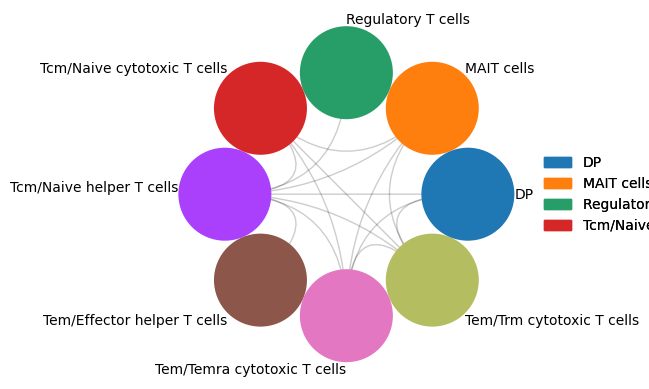

In [67]:
ddl.pl.clone_overlap(
    adatax_L01, groupby="celltypist_annotation", weighted_overlap=False
)

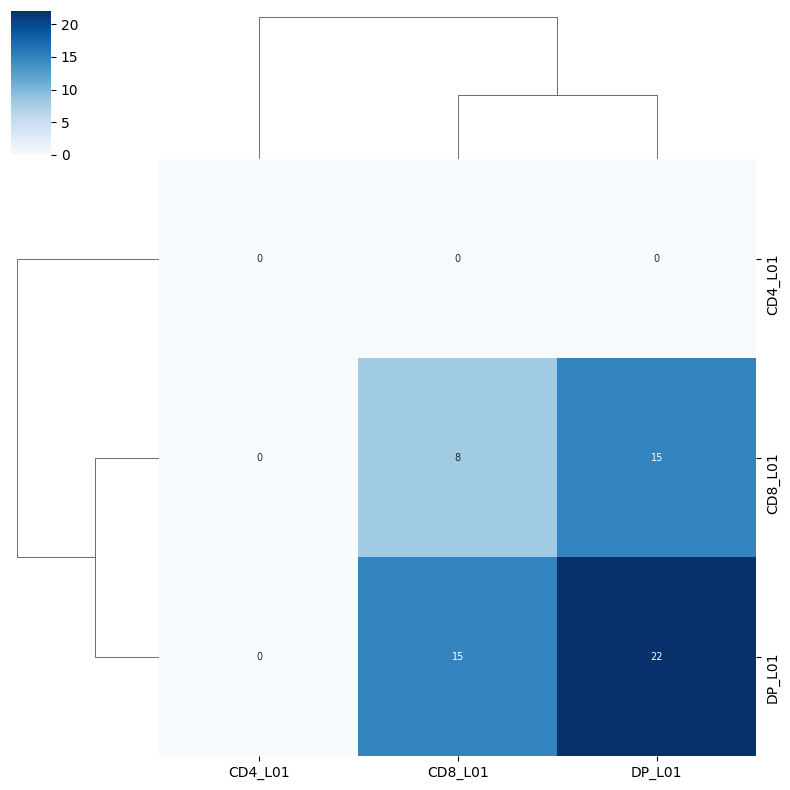

In [68]:
ddl.tl.clone_overlap(
    adatax_L01, groupby="sample", weighted_overlap=True
)
ddl.pl.clone_overlap(
    adatax_L01,
    groupby="sample",
    #colorby="celltypist_annotation",
    weighted_overlap=True,
    as_heatmap=True,
    # seaborn clustermap kwargs
    cmap="Blues",
    annot=True,
    figsize=(8, 8),
    annot_kws={"size": 7},
)

In [69]:
adatax_P01 = adatax[adatax.obs['donor'] == "P01"]
adatax_P01.obs

sample sort_type donor  n_genes_by_counts  \
CD4_P01_AAACCTGAGAGACTTA-1  CD4_P01       CD4   P01                315   
CD4_P01_AAACCTGAGAGCTGGT-1  CD4_P01       CD4   P01                393   
CD4_P01_AAACCTGAGAGTCTGG-1  CD4_P01       CD4   P01                287   
CD4_P01_AAACCTGAGCCTCGTG-1  CD4_P01       CD4   P01                337   
CD4_P01_AAACCTGAGGGTTCCC-1  CD4_P01       CD4   P01                280   
...                             ...       ...   ...                ...   
DP_P01_TTTGTCAGTCCAACTA-1    DP_P01        DP   P01                474   
DP_P01_TTTGTCAGTTTGTGTG-1    DP_P01        DP   P01                544   
DP_P01_TTTGTCATCAACGGGA-1    DP_P01        DP   P01                600   
DP_P01_TTTGTCATCTACGAGT-1    DP_P01        DP   P01                412   
DP_P01_TTTGTCATCTTAGAGC-1    DP_P01        DP   P01                392   

                            total_counts  total_counts_mt  pct_counts_mt  \
CD4_P01_AAACCTGAGAGACTTA-1         623.0              2.0       0.321027   
CD4_P01_AAACCTGAGAGCTGGT-1         747.0              6.0       0.803213   
CD4_P01_AAACCTGAGAGTCTGG-1         596.0              0.0       0.000000   
CD4_P01_AAACCTGAGCCTCGTG-1         570.0              0.0       0.000000   
CD4_P01_AAACCTGAGGGTTCCC-1         540.0              0.0       0.000000   
...                                  ...              ...            ...   
DP_P01_TTTGTCAGTCCAACTA-1          962.0             12.0       1.247401   
DP_P01_TTTGTCAGTTTGTGTG-1          885.0              6.0       0.677966   
DP_P01_TTTGTCATCAACGGGA-1         1121.0             15.0       1.338091   
DP_P01_TTTGTCATCTACGAGT-1          710.0             18.0       2.535211   
DP_P01_TTTGTCATCTTAGAGC-1          655.0             11.0       1.679389   

                            scrublet_score  n_genes  \
CD4_P01_AAACCTGAGAGACTTA-1        0.141884      315   
CD4_P01_AAACCTGAGAGCTGGT-1        0.248696      393   
CD4_P01_AAACCTGAGAGTCTGG-1        0.106742      287   
CD4_P01_AAACCTGAGCCTCGTG-1        0.076570      337   
CD4_P01_AAACCTGAGGGTTCCC-1        0.231527      280   
...                                    ...      ...   
DP_P01_TTTGTCAGTCCAACTA-1         0.211679      474   
DP_P01_TTTGTCAGTTTGTGTG-1         0.333333      544   
DP_P01_TTTGTCATCAACGGGA-1         0.203540      600   
DP_P01_TTTGTCATCTACGAGT-1         0.058637      412   
DP_P01_TTTGTCATCTTAGAGC-1         0.133940      392   

                            gmm_pct_count_clusters_keep  ...  \
CD4_P01_AAACCTGAGAGACTTA-1                         True  ...   
CD4_P01_AAACCTGAGAGCTGGT-1                         True  ...   
CD4_P01_AAACCTGAGAGTCTGG-1                         True  ...   
CD4_P01_AAACCTGAGCCTCGTG-1                         True  ...   
CD4_P01_AAACCTGAGGGTTCCC-1                         True  ...   
...                                                 ...  ...   
DP_P01_TTTGTCAGTCCAACTA-1                          True  ...   
DP_P01_TTTGTCAGTTTGTGTG-1                          True  ...   
DP_P01_TTTGTCATCAACGGGA-1                          True  ...   
DP_P01_TTTGTCATCTACGAGT-1                          True  ...   
DP_P01_TTTGTCATCTTAGAGC-1                          True  ...   

                           d_call_abT_VDJ_main j_call_abT_VDJ_main  \
CD4_P01_AAACCTGAGAGACTTA-1           No_contig           No_contig   
CD4_P01_AAACCTGAGAGCTGGT-1           No_contig           No_contig   
CD4_P01_AAACCTGAGAGTCTGG-1           No_contig           No_contig   
CD4_P01_AAACCTGAGCCTCGTG-1           No_contig           No_contig   
CD4_P01_AAACCTGAGGGTTCCC-1           No_contig           No_contig   
...                                        ...                 ...   
DP_P01_TTTGTCAGTCCAACTA-1                TRBD1             TRBJ2-1   
DP_P01_TTTGTCAGTTTGTGTG-1                 None             TRBJ1-4   
DP_P01_TTTGTCATCAACGGGA-1            No_contig           No_contig   
DP_P01_TTTGTCATCTACGAGT-1            No_contig           No_contig   
DP_P01_TTTGTCATCTTAGAGC-1  

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/dandelion/tools/_tools.py:1658: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.


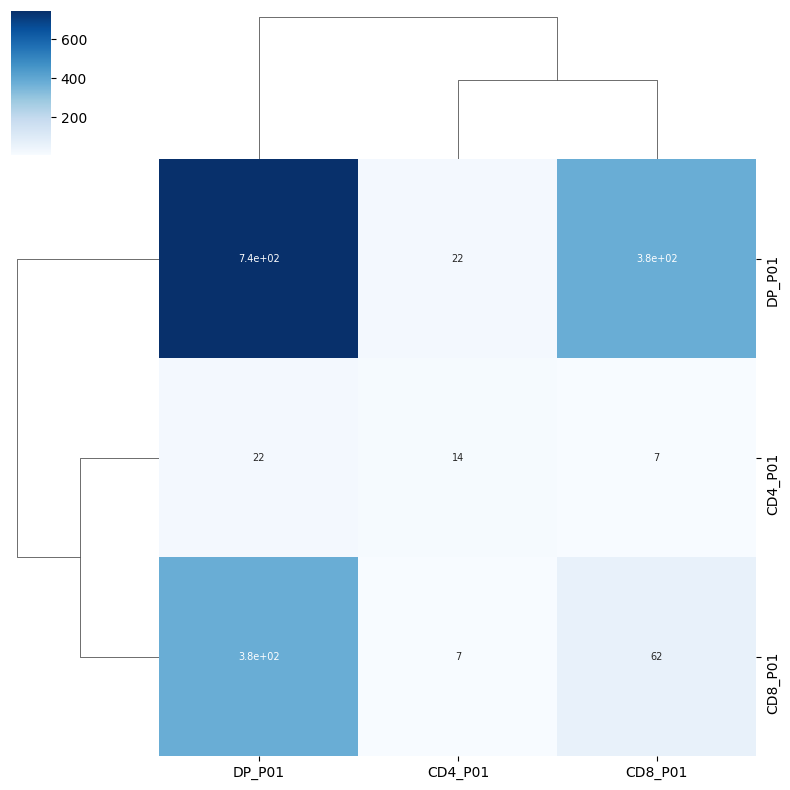

In [70]:
ddl.tl.clone_overlap(
    adatax_P01, groupby="sample", weighted_overlap=True
)
ddl.pl.clone_overlap(
    adatax_P01,
    groupby="sample",
    #colorby="celltypist_annotation",
    weighted_overlap=True,
    as_heatmap=True,
    # seaborn clustermap kwargs
    cmap="Blues",
    annot=True,
    figsize=(8, 8),
    annot_kws={"size": 7},
)

#### What about WY? 

In [71]:
adatax_WY = adatax[adatax.obs['donor'] == "WY"]
adatax_WY.obs

sample sort_type donor  n_genes_by_counts  \
CD4_WY_AAACCTGAGAATGTTG-1  CD4_WY       CD4    WY               2397   
CD4_WY_AAACCTGAGGGTATCG-1  CD4_WY       CD4    WY                946   
CD4_WY_AAACCTGAGGTGATAT-1  CD4_WY       CD4    WY               1500   
CD4_WY_AAACCTGAGGTTACCT-1  CD4_WY       CD4    WY               1077   
CD4_WY_AAACCTGAGGTTCCTA-1  CD4_WY       CD4    WY               1124   
...                           ...       ...   ...                ...   
DP_WY_TTTGGTTCACGGTTTA-1    DP_WY        DP    WY                469   
DP_WY_TTTGGTTGTAGCCTAT-1    DP_WY        DP    WY                522   
DP_WY_TTTGTCAAGTGGACGT-1    DP_WY        DP    WY                593   
DP_WY_TTTGTCAGTTACGGAG-1    DP_WY        DP    WY                307   
DP_WY_TTTGTCATCTCATTCA-1    DP_WY        DP    WY                456   

                           total_counts  total_counts_mt  pct_counts_mt  \
CD4_WY_AAACCTGAGAATGTTG-1        7956.0            108.0       1.357466   
CD4_WY_AAACCTGAGGGTATCG-1        2320.0             27.0       1.163793   
CD4_WY_AAACCTGAGGTGATAT-1        3912.0             42.0       1.073620   
CD4_WY_AAACCTGAGGTTACCT-1        2760.0             47.0       1.702899   
CD4_WY_AAACCTGAGGTTCCTA-1        3057.0             27.0       0.883219   
...                                 ...              ...            ...   
DP_WY_TTTGGTTCACGGTTTA-1          866.0              5.0       0.577367   
DP_WY_TTTGGTTGTAGCCTAT-1         1075.0             21.0       1.953488   
DP_WY_TTTGTCAAGTGGACGT-1         1025.0             24.0       2.341463   
DP_WY_TTTGTCAGTTACGGAG-1          522.0              2.0       0.383142   
DP_WY_TTTGTCATCTCATTCA-1          791.0              4.0       0.505689   

                           scrublet_score  n_genes  \
CD4_WY_AAACCTGAGAATGTTG-1        0.360190     2397   
CD4_WY_AAACCTGAGGGTATCG-1        0.158672      946   
CD4_WY_AAACCTGAGGTGATAT-1        0.154217     1500   
CD4_WY_AAACCTGAGGTTACCT-1        0.231527     1077   
CD4_WY_AAACCTGAGGTTCCTA-1        0.178523     1124   
...                                   ...      ...   
DP_WY_TTTGGTTCACGGTTTA-1         0.305785      469   
DP_WY_TTTGGTTGTAGCCTAT-1         0.197674      522   
DP_WY_TTTGTCAAGTGGACGT-1         0.167808      593   
DP_WY_TTTGTCAGTTACGGAG-1         0.149606      307   
DP_WY_TTTGTCATCTCATTCA-1         0.181818      456   

                           gmm_pct_count_clusters_keep  ...  \
CD4_WY_AAACCTGAGAATGTTG-1                         True  ...   
CD4_WY_AAACCTGAGGGTATCG-1                         True  ...   
CD4_WY_AAACCTGAGGTGATAT-1                         True  ...   
CD4_WY_AAACCTGAGGTTACCT-1                         True  ...   
CD4_WY_AAACCTGAGGTTCCTA-1                         True  ...   
...                                                ...  ...   
DP_WY_TTTGGTTCACGGTTTA-1                          True  ...   
DP_WY_TTTGGTTGTAGCCTAT-1                          True  ...   
DP_WY_TTTGTCAAGTGGACGT-1                          True  ...   
DP_WY_TTTGTCAGTTACGGAG-1                          True  ...   
DP_WY_TTTGTCATCTCATTCA-1                          True  ...   

                          d_call_abT_VDJ_main j_call_abT_VDJ_main  \
CD4_WY_AAACCTGAGAATGTTG-1           No_contig           No_contig   
CD4_WY_AAACCTGAGGGTATCG-1                None             TRBJ2-1   
CD4_WY_AAACCTGAGGTGATAT-1                None             TRBJ2-3   
CD4_WY_AAACCTGAGGTTACCT-1                None             TRBJ1-2   
CD4_WY_AAACCTGAGGTTCCTA-1                None             TRBJ2-6   
...                                       ...                 ...   
DP_WY_TTTGGTTCACGGTTTA-1            No_contig           No_contig   
DP_WY_TTTGGTTGTAGCCTAT-1                 None             TRBJ2-4   
DP_WY_TTTGTCAAGTGGACGT-1                 None             TRBJ2-1   
DP_WY_TTTGTCAGTTACGGAG-1                 None             TRBJ2-7   
DP_WY_TTTGTCATCTCATTCA-1            No_contig           No_contig   

                          

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/dandelion/tools/_tools.py:1658: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.


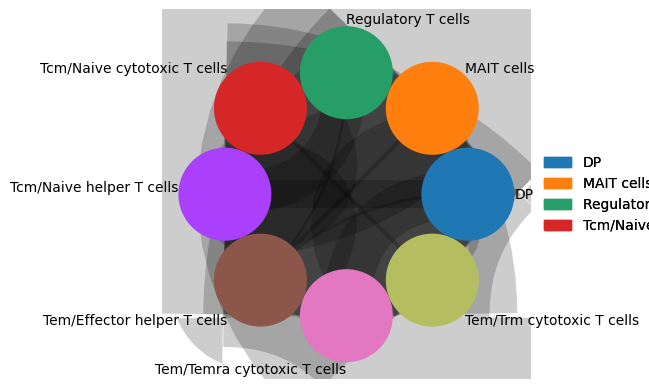

In [72]:
ddl.tl.clone_overlap(
    adatax_WY, groupby="celltypist_annotation", weighted_overlap=True
)
ddl.pl.clone_overlap(
    adatax_WY, groupby="celltypist_annotation", weighted_overlap=True
)

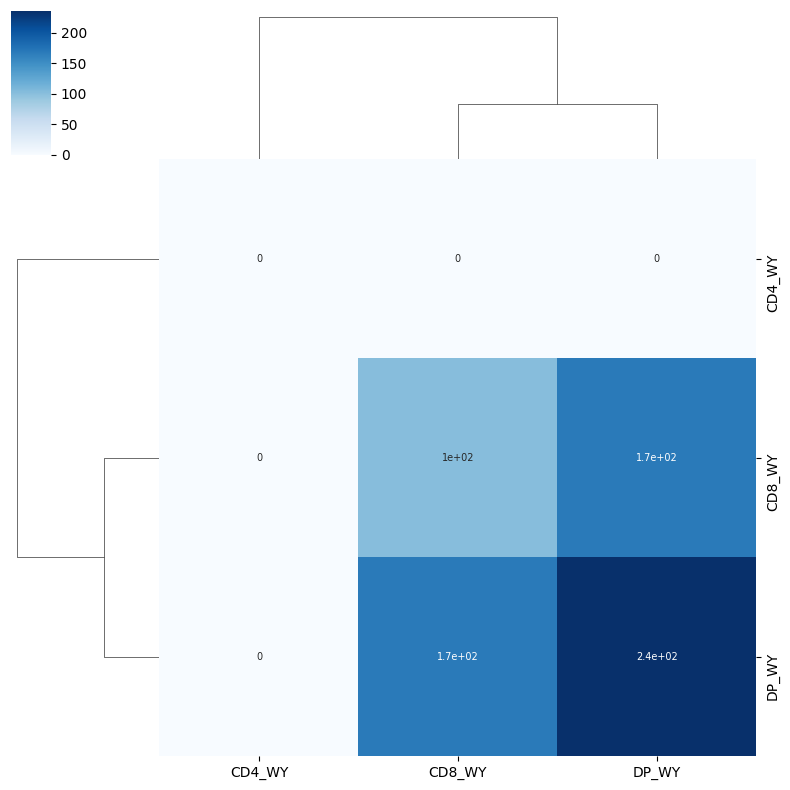

In [73]:
ddl.tl.clone_overlap(
    adatax_WY, groupby="sample", weighted_overlap=True
)
ddl.pl.clone_overlap(
    adatax_WY,
    groupby="sample",
    #colorby="celltypist_annotation",
    weighted_overlap=True,
    as_heatmap=True,
    # seaborn clustermap kwargs
    cmap="Blues",
    annot=True,
    figsize=(8, 8),
    annot_kws={"size": 7},
)

# VDJ PSEUDOBULK

In [74]:
import dandelion as ddl
import pandas as pd
import scanpy as sc
import numpy as np
import warnings
import os

warnings.filterwarnings("ignore")

In [75]:
import milopy.core as milo
import palantir

#required because of Palantir
%matplotlib inline

sc.settings.set_figure_params(dpi=80)

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


Prior to performing the pseudobulking, it is recommended to run ddl.tl.setup_vdj_pseudobulk(). This will subset the object to just cells with at least a pair of chains, and prepare appropriately named and formatted columns for the pseudobulking function to use as defaults.

In [76]:
adatax = ddl.tl.setup_vdj_pseudobulk(adatax)

We’re going to be using Milopy to create pseudobulks. Construct a neighbour graph with many neighbours, following Milopy protocol, and then sample representative neighbourhoods from the object. This saves a cell-by-pseudobulk matrix into adata.obsm["nhoods"]. Use this graph to generate a UMAP as well.

In [77]:
adatax

AnnData object with n_obs × n_vars = 25764 × 2285
    obs: 'sample', 'sort_type', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'batch', 'CD4/CD8_geneset', 'leiden', 'celltypist_majority_voting', 'celltypist_annotation', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig', 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VD

In [78]:
sc.pp.neighbors(adatax, use_rep="X_umap", n_neighbors=50)
milo.make_nhoods(adatax)
sc.tl.umap(adatax)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Now we are armed with everything we need to construct the VJ feature space. Pseudobulks can be defined either via passing a list of .obs metadata columns, the unique values of the combination of which will serve as individual pseudobulks (via obs_to_bulk), or via an explicit cell-by-pseudobulk matrix (via pbs). Milopy created one of those for us, so we can use that as input.

In [79]:
adatax

AnnData object with n_obs × n_vars = 25764 × 2285
    obs: 'sample', 'sort_type', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'batch', 'CD4/CD8_geneset', 'leiden', 'celltypist_majority_voting', 'celltypist_annotation', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig', 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VD

The cell type annotation lives in .obs["anno_lvl_2_final_clean"]. Let’s tell the function that we want to take the most common value per pseudobulk with us to the new VJ feature space object.

In [80]:
pb_adatax = ddl.tl.vdj_pseudobulk(
    adatax, pbs=adatax.obsm["nhoods"], obs_to_take="celltypist_annotation"
)

The new object has pseudobulks as observations, and the unique encountered VJ genes as the features. We can see the per-pseudobulk annotation, and .obsm["pbs"]. In our case it’s just a copy of the pbs argument, but if we were to go for obs_to_bulk this would be a cells by pseudobulks matrix capturing the assignment of the original cells.

In [81]:
pb_adatax

AnnData object with n_obs × n_vars = 2441 × 157
    obs: 'celltypist_annotation', 'celltypist_annotation_fraction', 'cell_count'
    obsm: 'pbs'

Now that we have our VJ feature space pseudobulk object, we can do things with it. Let’s run a PCA on it. The development trajectory is very nicely captured in the first two PC dimensions.

In [82]:
sc.tl.pca(pb_adatax)


findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

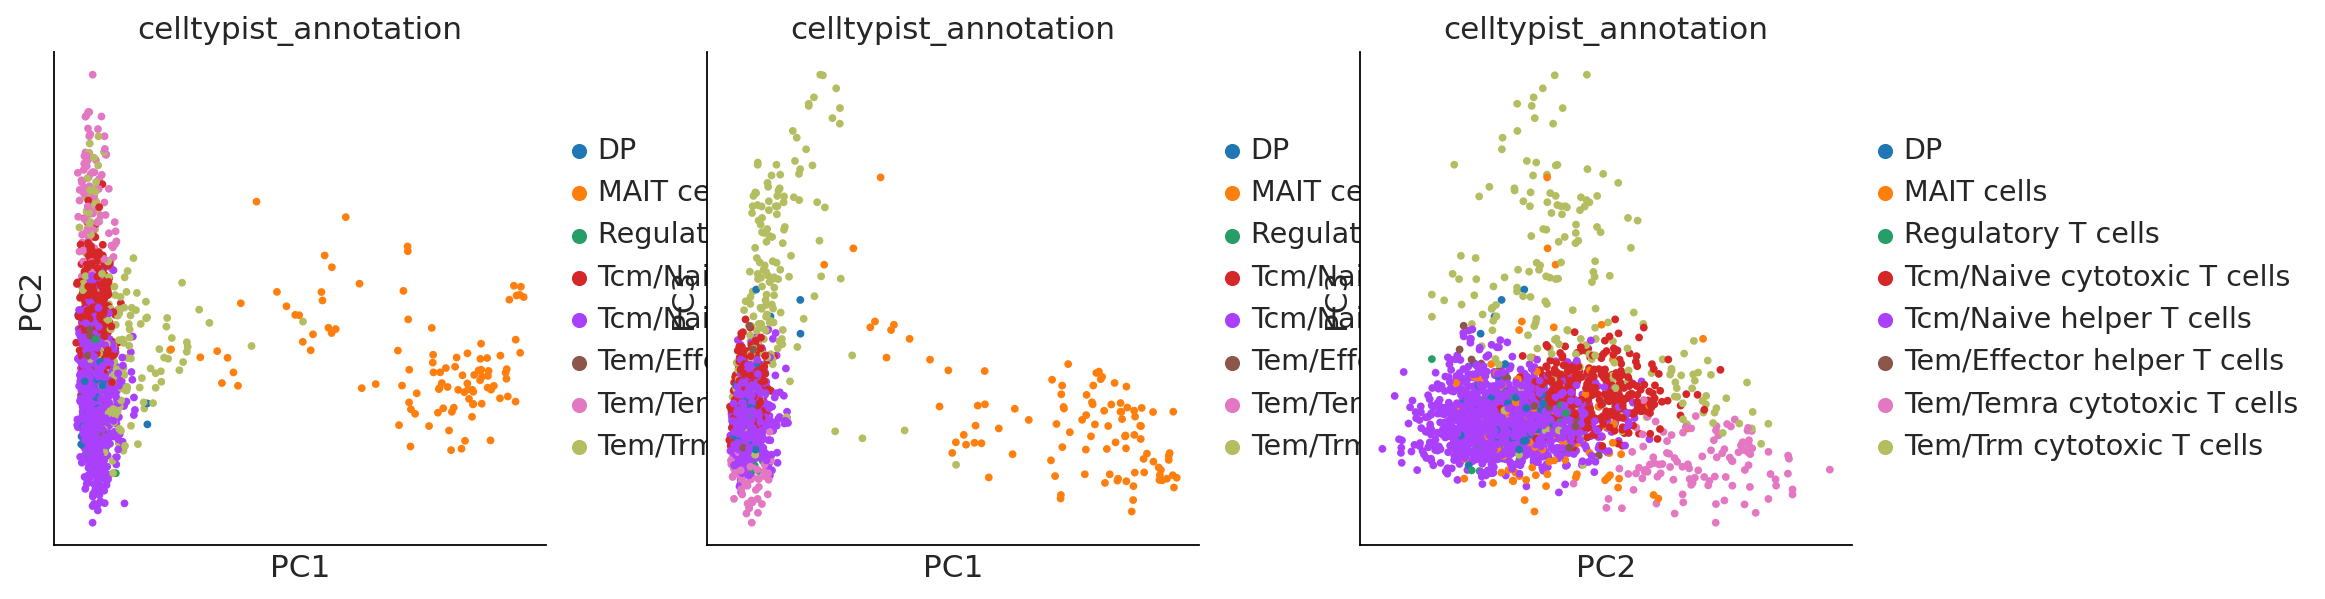

In [83]:
sc.pl.pca(pb_adatax, color="celltypist_annotation", dimensions= [(0,1), (0,2), (1,2)])

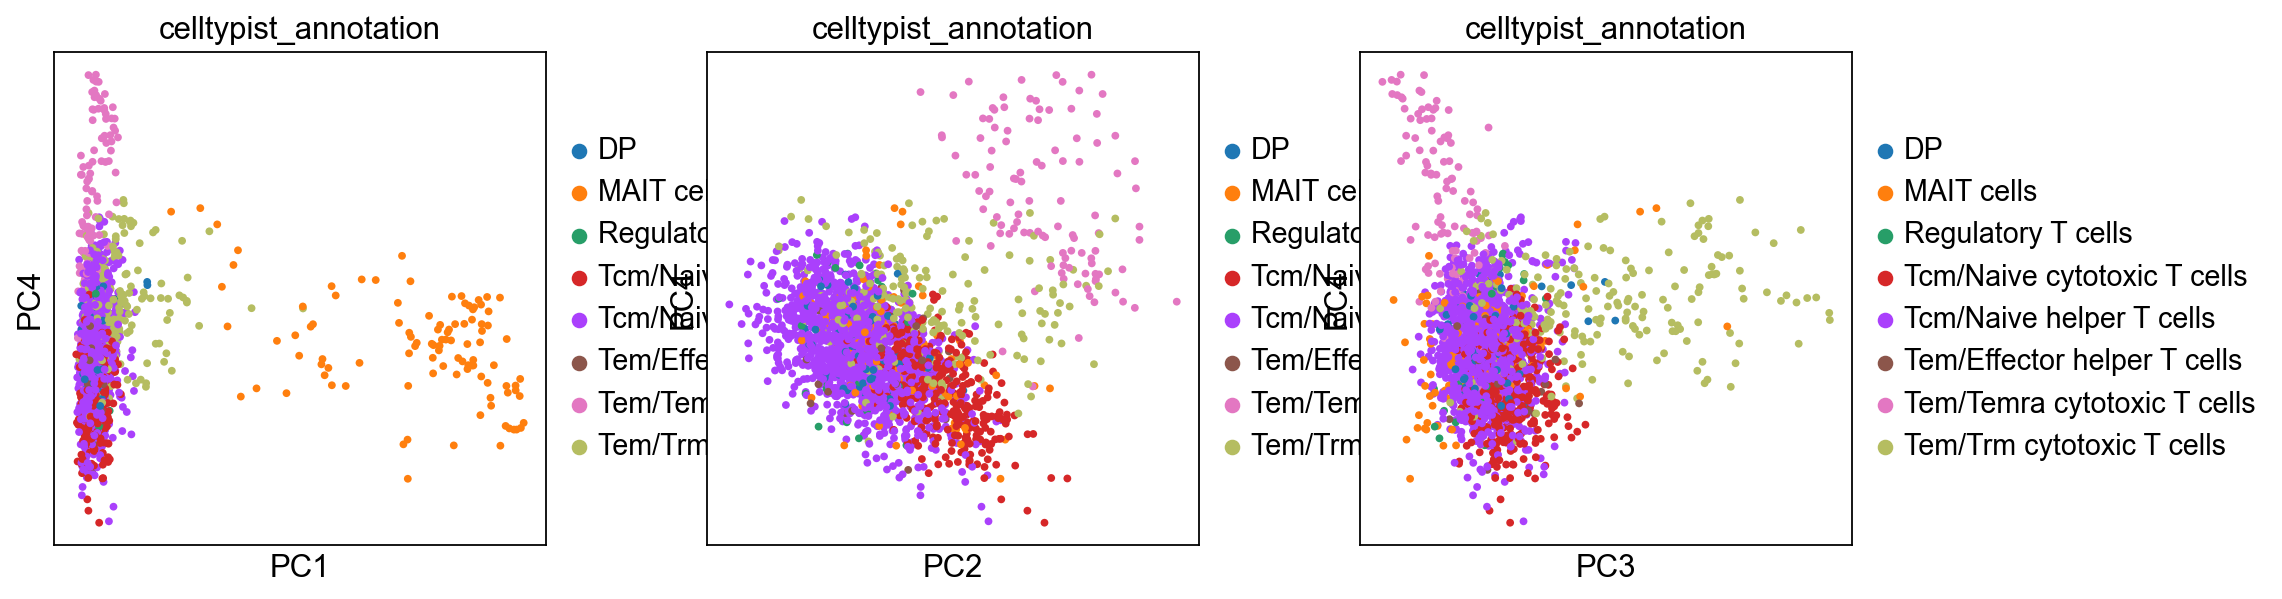

In [83]:
sc.pl.pca(pb_adatax, color="celltypist_annotation", dimensions= [(0,3), (1,3), (2,3)])

Maybe PC2/4?? 

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

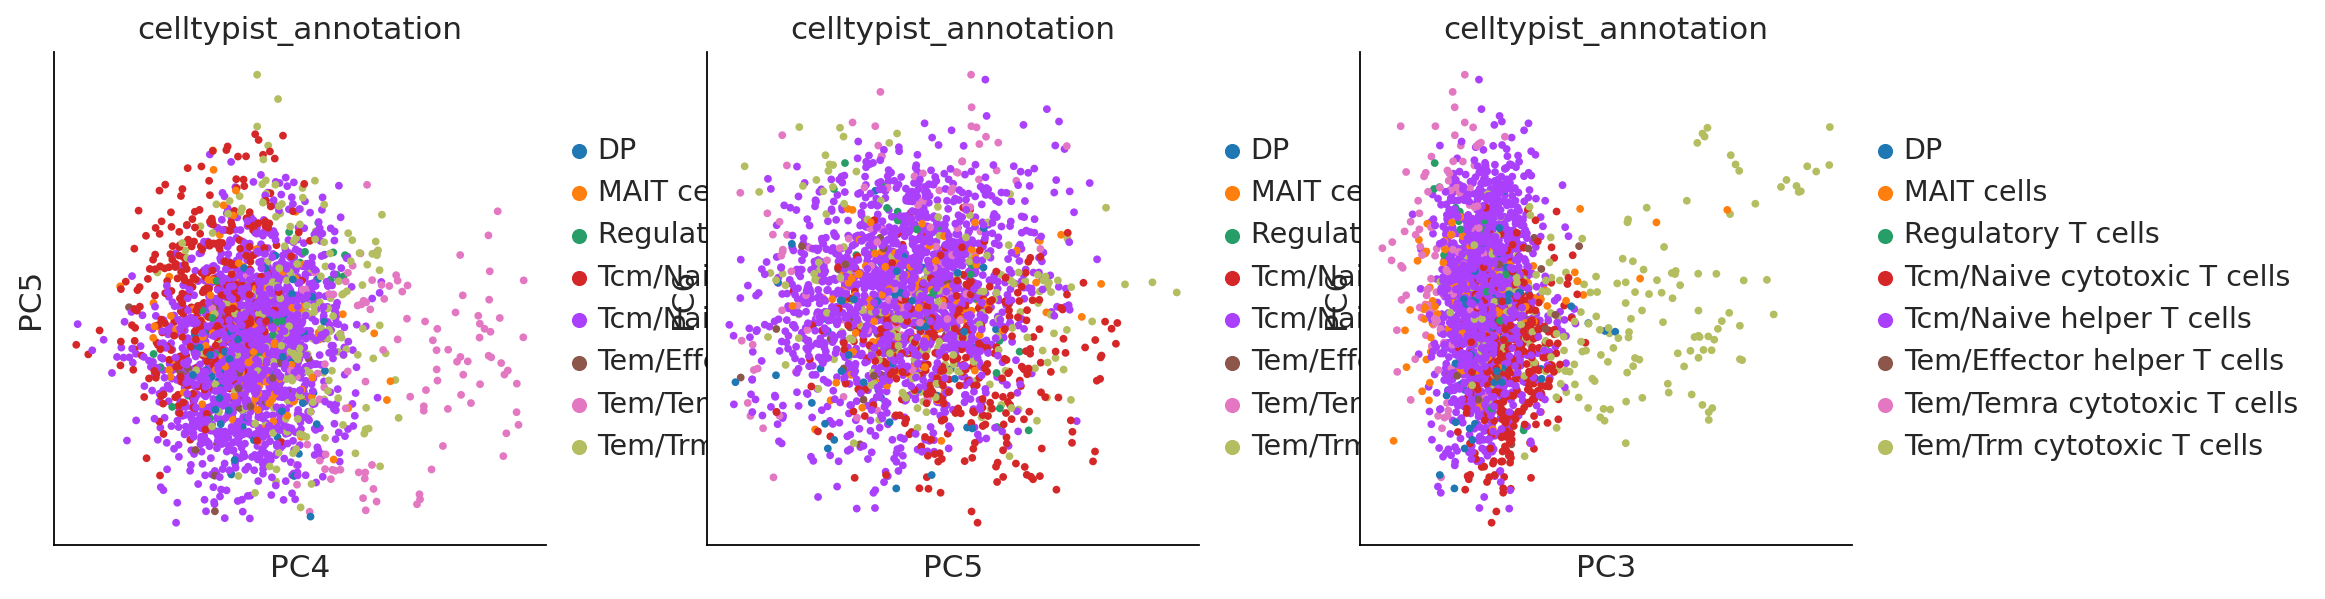

In [84]:
sc.pl.pca(pb_adatax, color="celltypist_annotation", dimensions= [(3,4), (4,5), (2,5)])

Let’s make a UMAP of the pseudobulks.

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

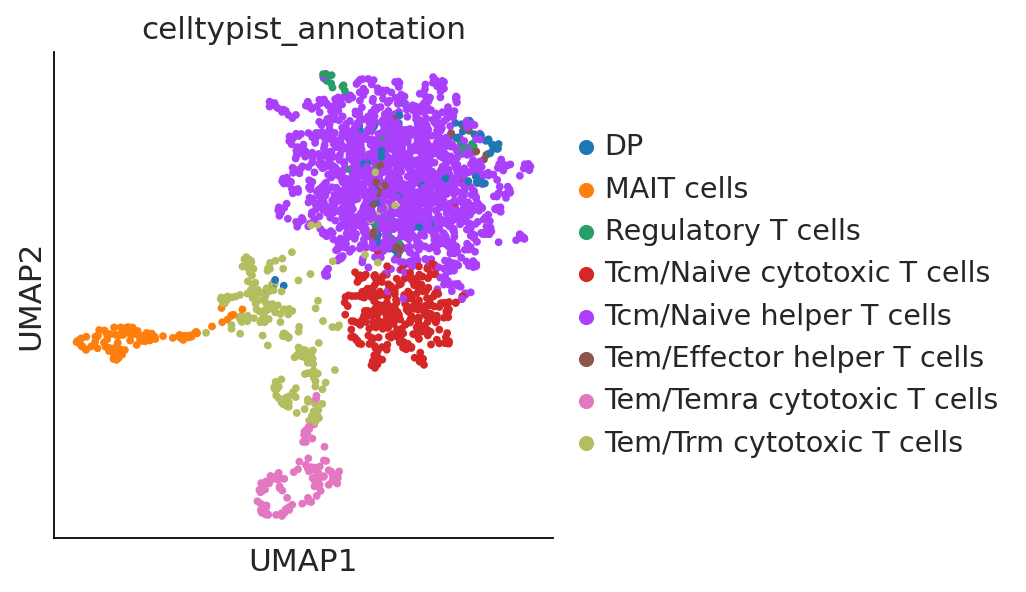

In [85]:
sc.pp.neighbors(pb_adatax)
sc.tl.umap(pb_adatax)
sc.pl.umap(pb_adatax, color="celltypist_annotation")

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

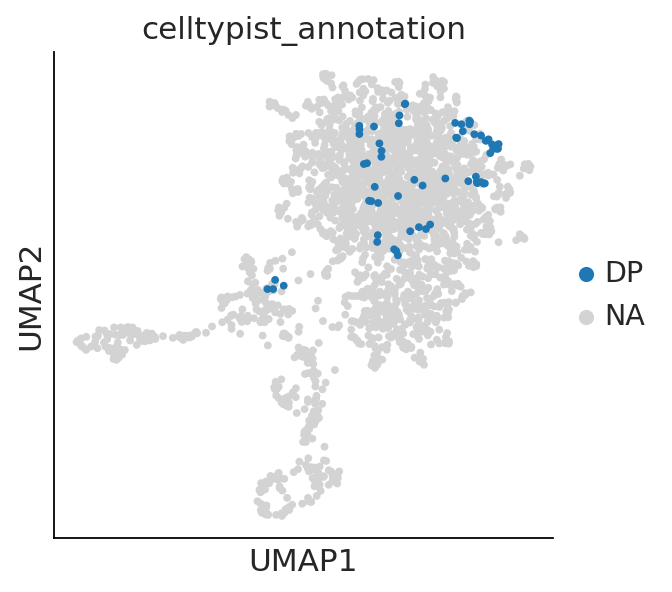

In [86]:
sc.pl.umap(pb_adatax, color="celltypist_annotation", groups = ['DP'])

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

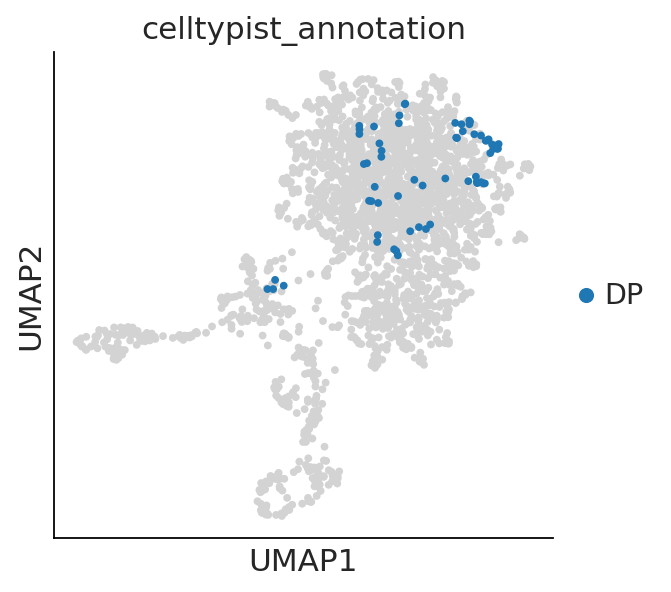

In [87]:
sc.pl.umap(pb_adatax, color="celltypist_annotation", groups = ['DP'], na_in_legend= False)

# tl.vj_usage_pca

You can also compute the V/J gene usage in your various groups of interest. This function will return a new AnnData where instead of cells (obs) by gene (var), it will be groupby (obs) by V/J genes (var).

For example, I’m interested if the leiden clusters within each donor’s sample use V/J genes differently:

In [74]:
# first make a concatenated group
adatax.obs["donor_annotation"] = [
    s + "_" + l for s, l in zip(adatax.obs["donor"], adatax.obs["celltypist_annotation"])
]
new_adatax = ddl.tl.vj_usage_pca(
    adatax,
    groupby="donor_annotation",
    mode="abT",  # because B=B cells, use abT and gdT for alpha-beta and gamma-delta T cells respectively
    transfer_mapping=[
        "donor",
        "celltypist_annotation",
    ],  # this transfers the sample_id and leiden values separately. if not provided, only sample_id_leiden is transferred.
    n_comps=10,  # 3 because the example is small here. the default is set at 30
)
new_adatax


AnnData object with n_obs × n_vars = 32 × 157
    obs: 'cell_type', 'cell_count', 'donor', 'celltypist_annotation'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.


findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

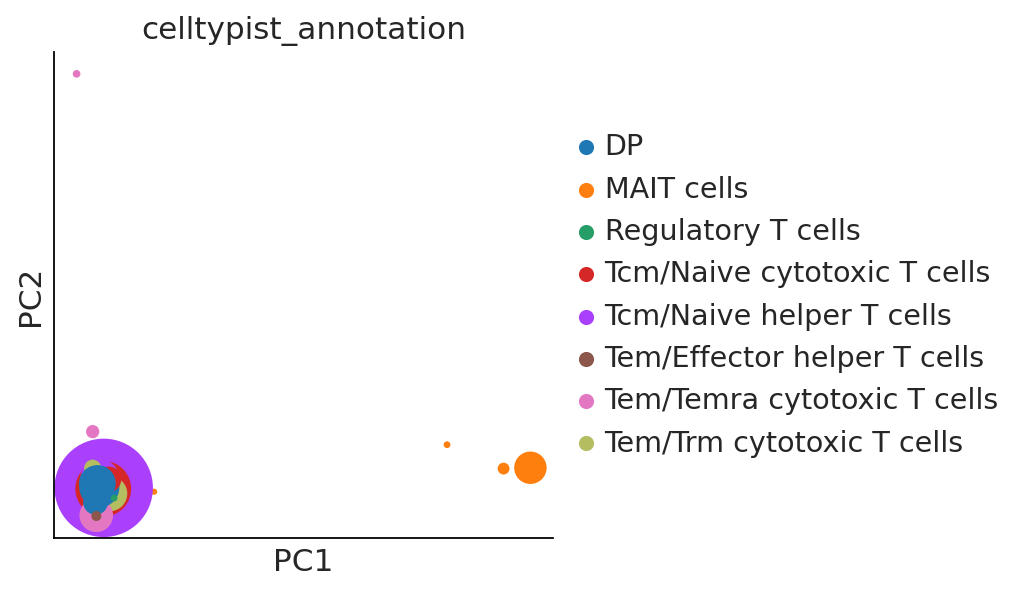

In [75]:
sc.set_figure_params()

sc.pl.pca(new_adatax, color="celltypist_annotation", size=new_adatax.obs["cell_count"])
# each dot is a `sample_id_leiden`. Check the .obs

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

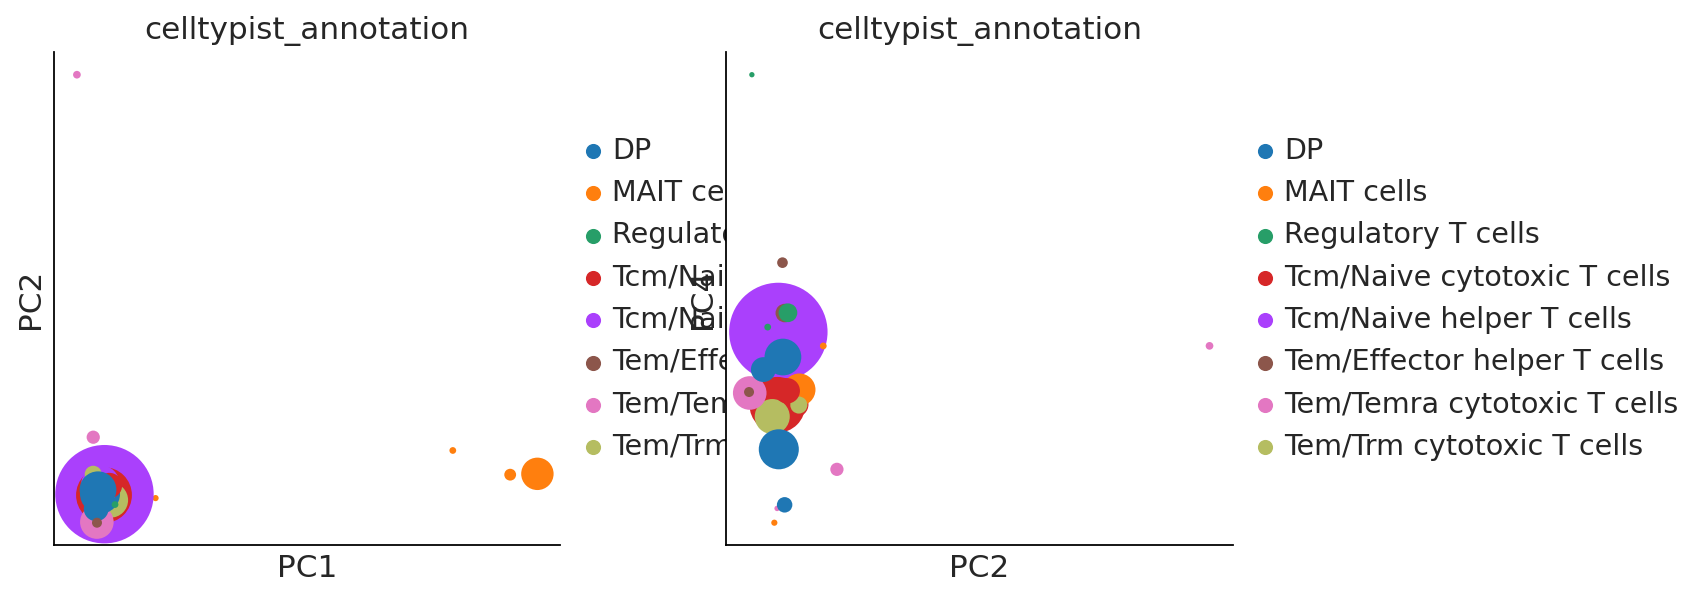

In [76]:
sc.pl.pca(new_adatax, color="celltypist_annotation", size=new_adatax.obs["cell_count"], dimensions= [(0,1), (1,3)])

# Redoing in just single-chains

Jaz mentions that the double-sort may cause membrane-shaering hence having extra TCRs attaching to cells when they are not meant to. Also, dandelion doesn't automatically filters for cells with ab single-cgains only. They compute things with b-only as well. So try to br stringent. 

In [55]:
adatax.obs['chain_status']

CD4_L01_AAACCTGAGAGCTATA-1      No_contig
CD4_L01_AAACCTGAGGAGCGAG-1      No_contig
CD4_L01_AAACCTGAGGCAGTCA-1    Single pair
CD4_L01_AAACCTGAGTCAAGCG-1    Single pair
CD4_L01_AAACCTGAGTCCTCCT-1    Single pair
                                 ...     
V_DP_TTTGTCACATATGGTC-1         No_contig
V_DP_TTTGTCACATGGTAGG-1         No_contig
V_DP_TTTGTCATCCTTGCCA-1         No_contig
V_DP_TTTGTCATCGCCATAA-1         No_contig
V_DP_TTTGTCATCTTGTTTG-1         No_contig
Name: chain_status, Length: 71564, dtype: category
Categories (4, object): ['Extra pair', 'No_contig', 'Orphan VDJ', 'Single pair']

In [56]:
#adatax_single = adatax[adatax.obs['clone_id'] != 'No_contig']
adatax_single = adatax[adatax.obs['chain_status'] == 'Single pair']

In [57]:
adatax_single.obs['chain_status']

CD4_L01_AAACCTGAGGCAGTCA-1    Single pair
CD4_L01_AAACCTGAGTCAAGCG-1    Single pair
CD4_L01_AAACCTGAGTCCTCCT-1    Single pair
CD4_L01_AAACCTGCACAAGTAA-1    Single pair
CD4_L01_AAACCTGCAGACTCGC-1    Single pair
                                 ...     
V_DP_TTTATGCGTCAGAAGC-1       Single pair
V_DP_TTTCCTCAGCTGAACG-1       Single pair
V_DP_TTTCCTCGTATGAAAC-1       Single pair
V_DP_TTTGGTTTCCCATTTA-1       Single pair
V_DP_TTTGGTTTCTTGTCAT-1       Single pair
Name: chain_status, Length: 24076, dtype: category
Categories (1, object): ['Single pair']

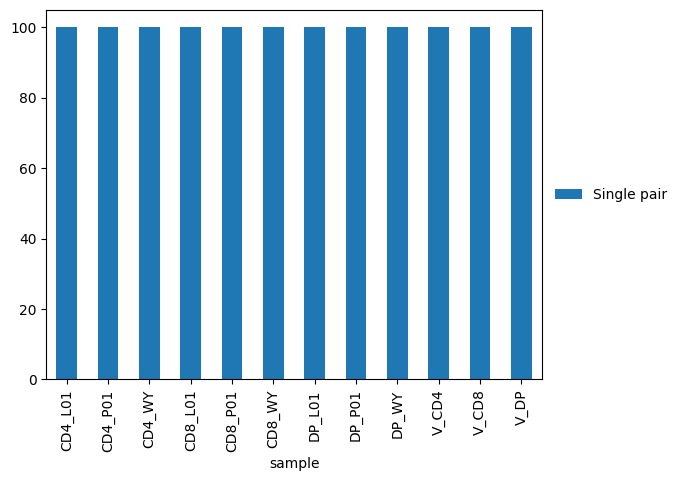

In [58]:
pd.crosstab(
    adatax_single.obs["sample"],
    adatax_single.obs["chain_status"],
).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

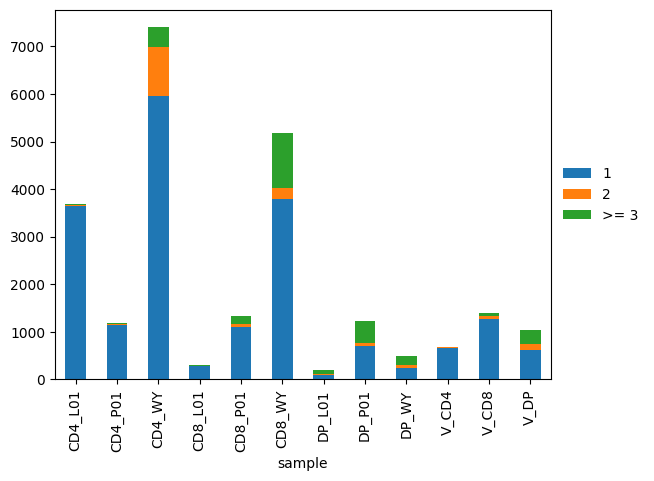

In [59]:
pd.crosstab(
    adatax_single.obs["sample"],
    adatax_single.obs["clone_id_size_max_3"],
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

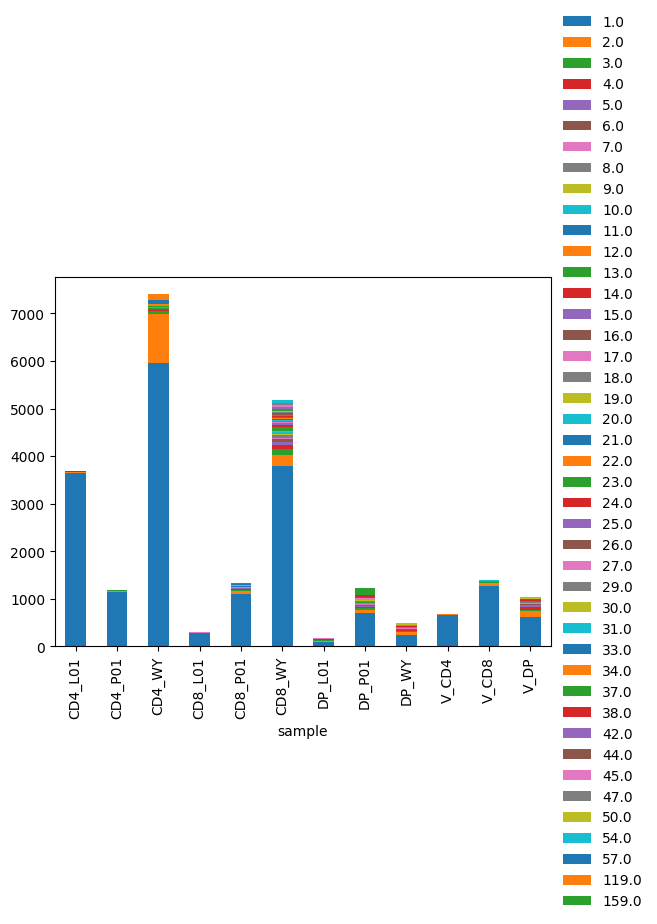

In [60]:
pd.crosstab(
    adatax_single.obs["sample"],
    adatax_single.obs["clone_id_size"],
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

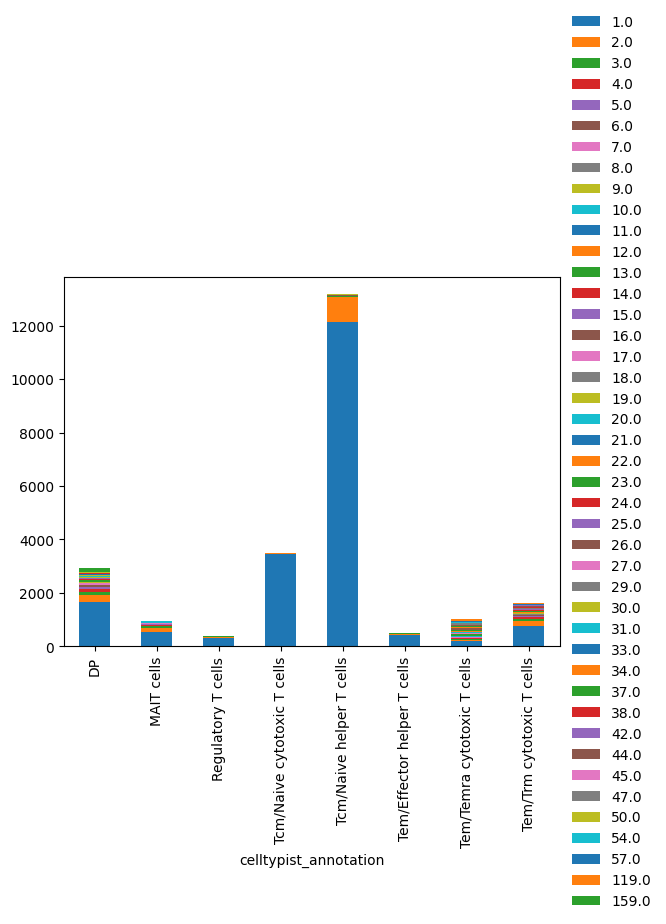

In [64]:
pd.crosstab(
    adatax_single.obs["celltypist_annotation"],
    adatax_single.obs["clone_id_size"],
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

In [62]:
plt.savefig('DPT_TCR_cloneidvalues_annotation_241023.png')

<Figure size 640x480 with 0 Axes>

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

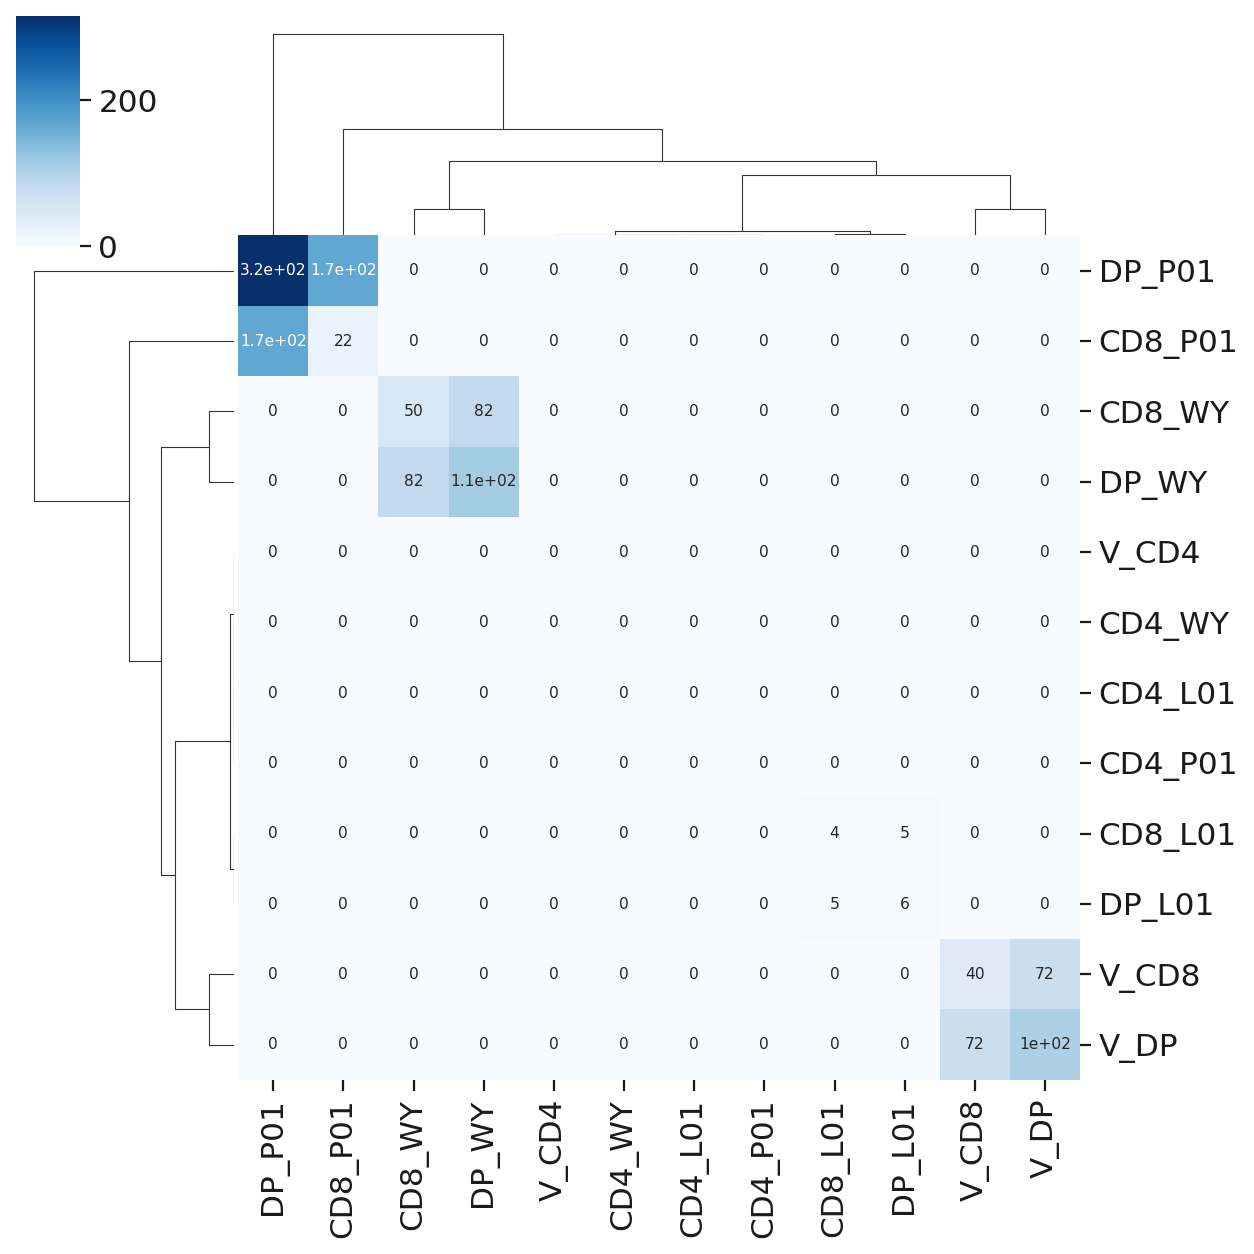

In [94]:
adatax_single.obs["sample"] = adatax2.obs["sample"].cat.reorder_categories(["CD4_L01", "CD4_P01", "CD4_WY", "V_CD4","CD8_L01", "CD8_P01", "CD8_WY", "V_CD8","DP_L01", "DP_P01", "DP_WY", "V_DP",])
ddl.tl.clone_overlap(
    adatax_single, groupby="sample", weighted_overlap=True
)

ddl.pl.clone_overlap(
    adatax_single,
    groupby="sample",
    #colorby="celltypist_annotation",
    weighted_overlap=True,
    as_heatmap=True,
    # seaborn clustermap kwargs
    cmap="Blues",
    annot=True,
    figsize=(8, 8),
    annot_kws={"size": 7},
)

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

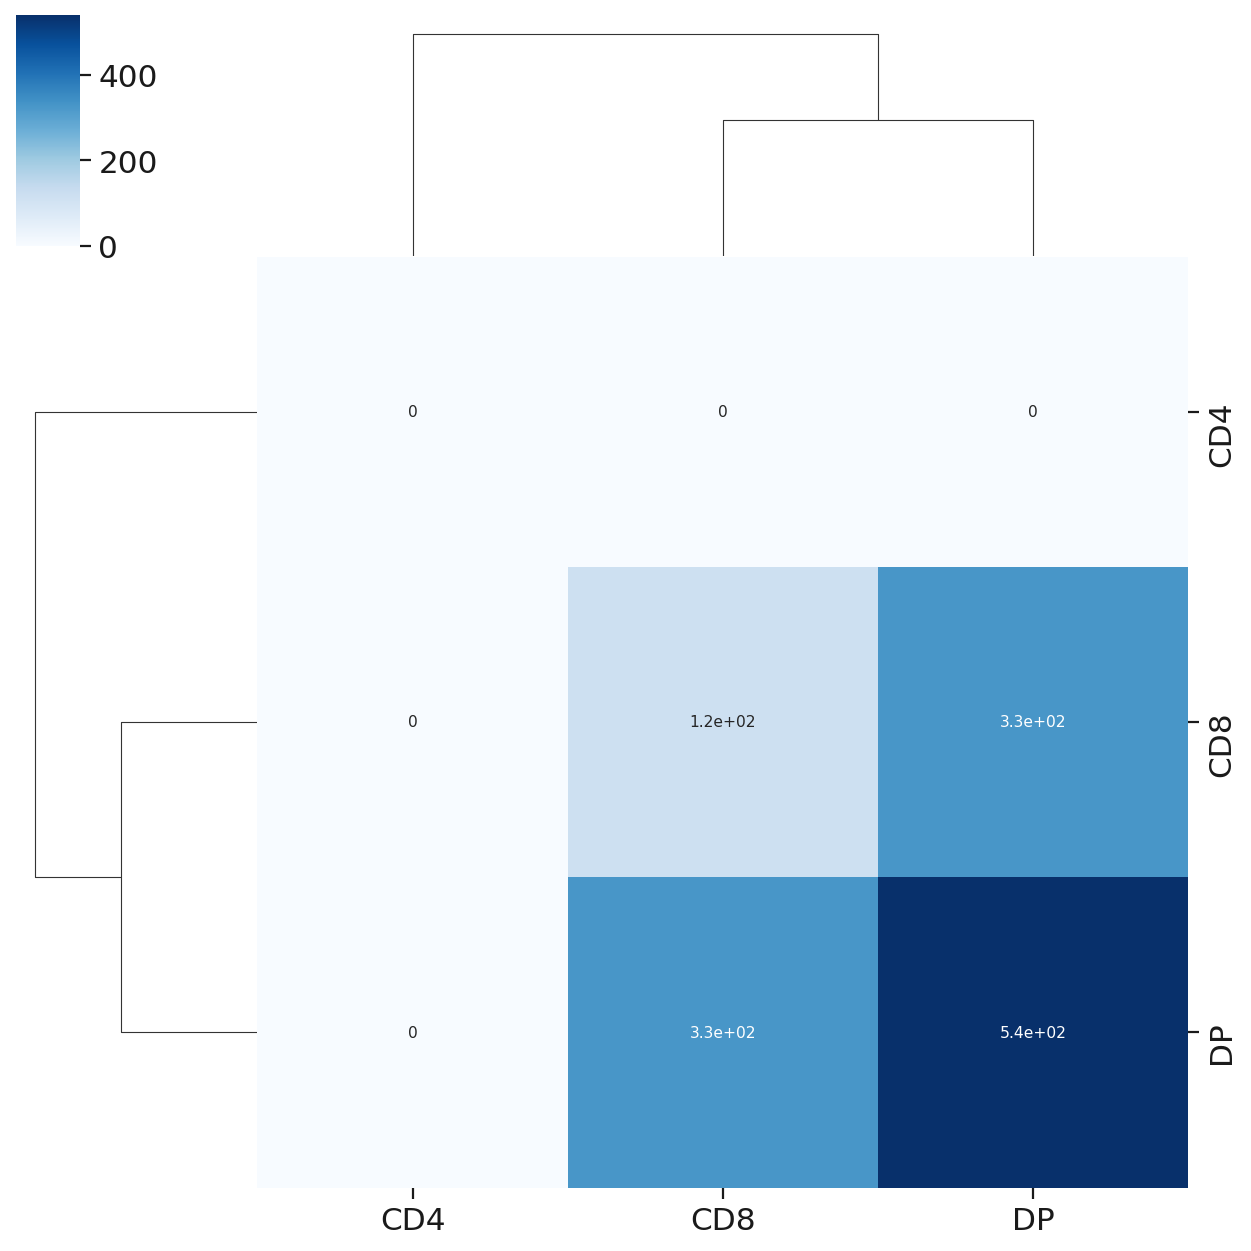

In [95]:
## CELLTYPE 
ddl.tl.clone_overlap(
    adatax_single, groupby="sort_type", weighted_overlap=True
)

ddl.pl.clone_overlap(
    adatax_single,
    groupby="sort_type",
    #colorby="celltypist_annotation",
    weighted_overlap=True,
    as_heatmap=True,
    # seaborn clustermap kwargs
    cmap="Blues",
    annot=True,
    figsize=(8, 8),
    annot_kws={"size": 7},
)

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

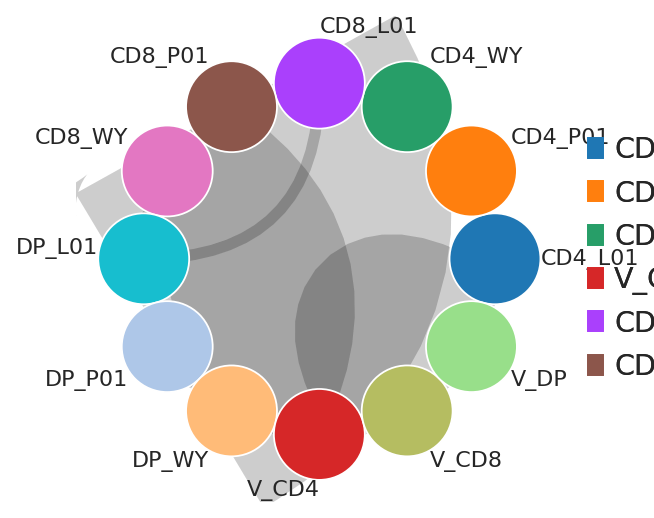

In [96]:
ddl.tl.clone_overlap(
    adatax_single, groupby="sample", weighted_overlap=True
)

ddl.pl.clone_overlap(
    adatax_single, groupby="sample", colorby="sample", weighted_overlap=True
)

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

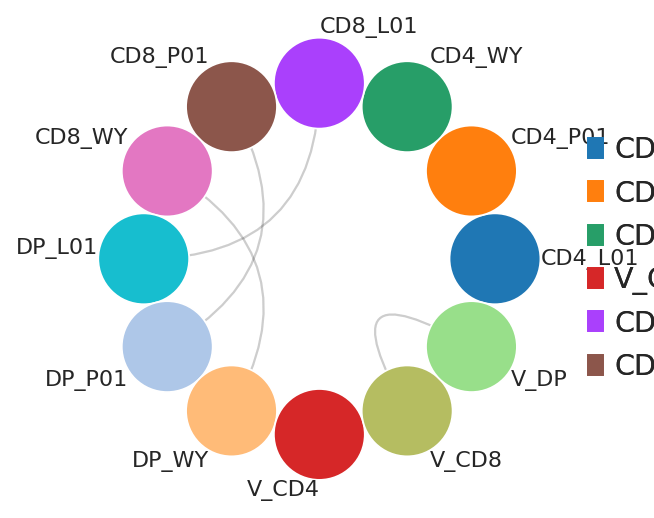

In [97]:
ddl.tl.clone_overlap(
    adatax_single, groupby="sample", weighted_overlap=True
)

ddl.pl.clone_overlap(
    adatax_single, groupby="sample", colorby="sample", weighted_overlap=False
)

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

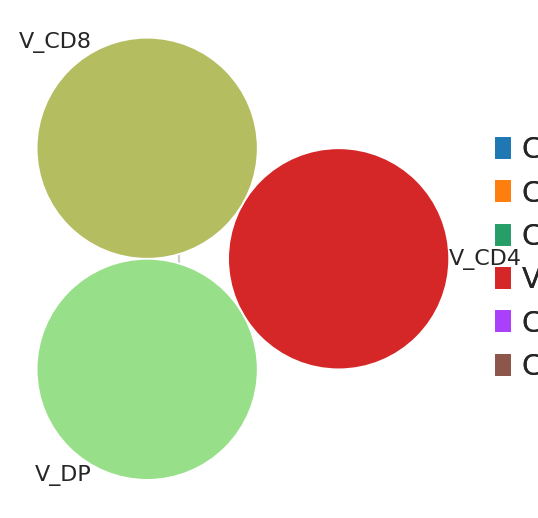

In [99]:
ddl.tl.clone_overlap(
    adatax_single, groupby="sort_type", weighted_overlap=True
)

ddl.pl.clone_overlap(
    adatax_single, groupby="sort_type", colorby="sample", weighted_overlap=False
)

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

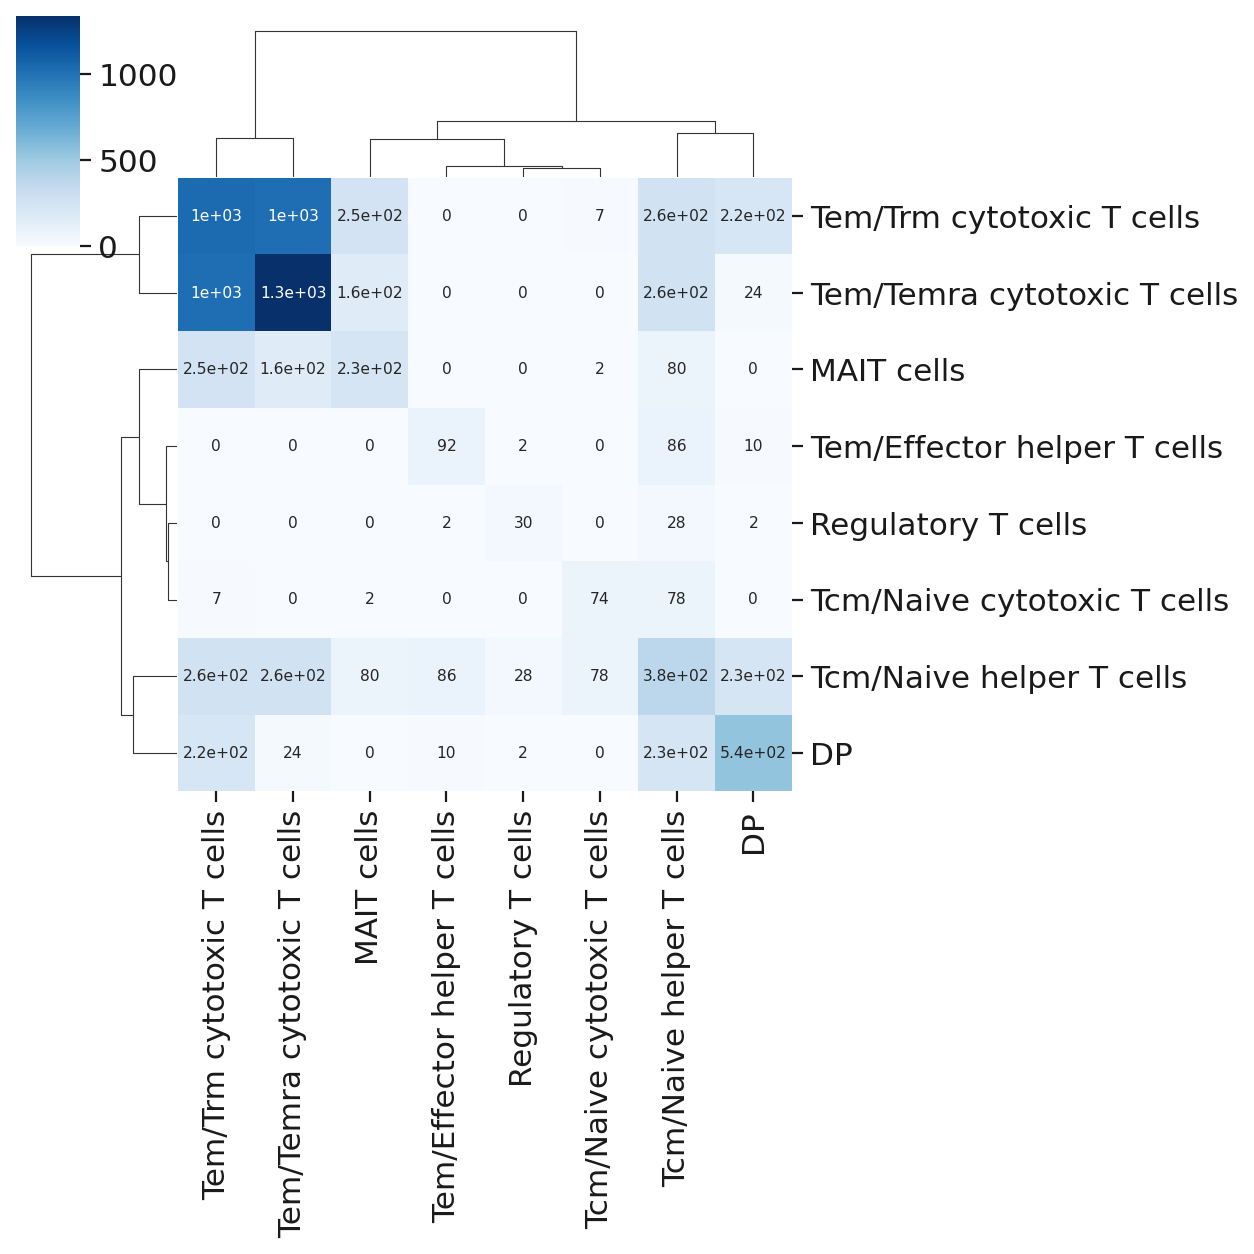

In [100]:
ddl.tl.clone_overlap(
    adatax_single, groupby="celltypist_annotation", weighted_overlap=True
)

ddl.pl.clone_overlap(
    adatax_single,
    groupby="celltypist_annotation",
    #colorby="celltypist_annotation",
    weighted_overlap=True,
    as_heatmap=True,
    # seaborn clustermap kwargs
    cmap="Blues",
    annot=True,
    figsize=(8, 8),
    annot_kws={"size": 7},
)

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

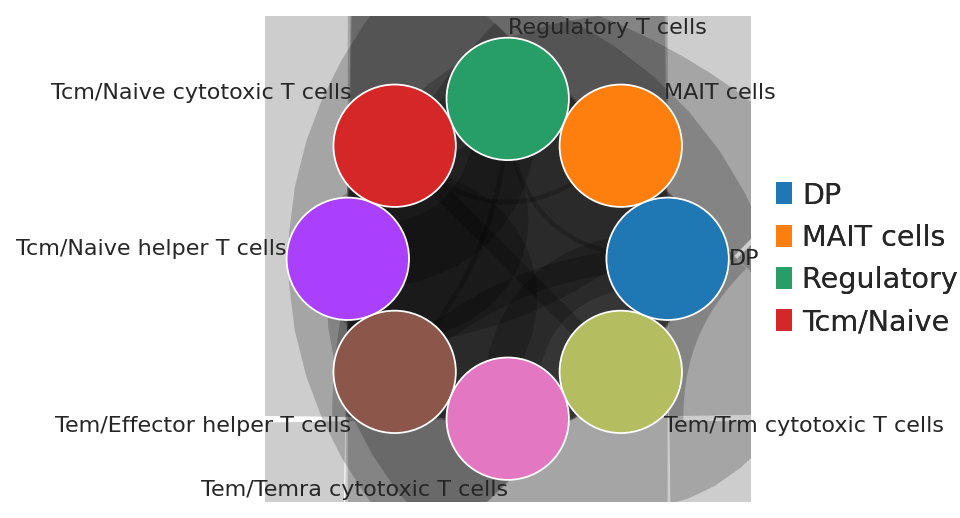

In [103]:
ddl.tl.clone_overlap(
    adatax_single, groupby="celltypist_annotation", weighted_overlap=True
)

ddl.pl.clone_overlap(
    adatax_single, groupby="celltypist_annotation", colorby="celltypist_annotation", weighted_overlap=True
)

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

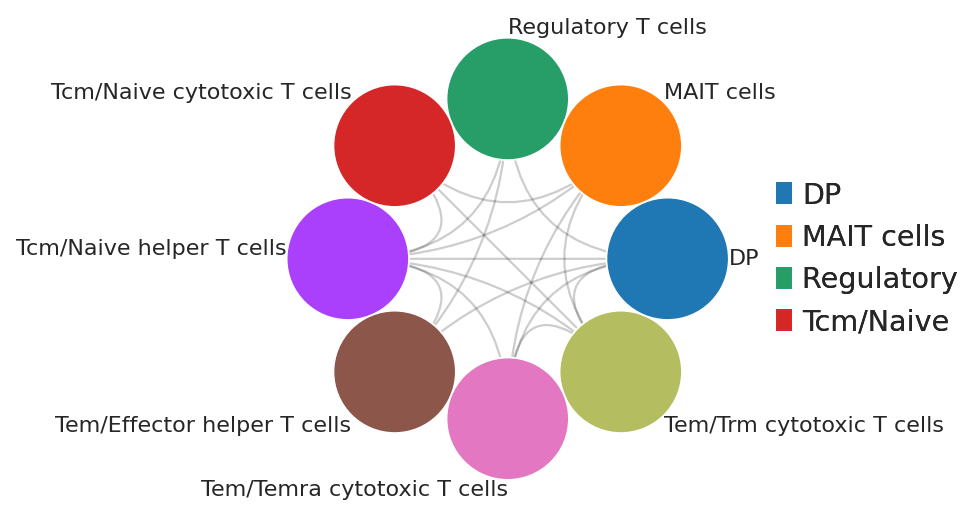

In [104]:
ddl.tl.clone_overlap(
    adatax_single, groupby="celltypist_annotation", weighted_overlap=False
)

ddl.pl.clone_overlap(
    adatax_single, groupby="celltypist_annotation", colorby="celltypist_annotation", weighted_overlap=False
)

In [105]:
adatax_single = ddl.tl.setup_vdj_pseudobulk(adatax_single)

In [106]:
sc.pp.neighbors(adatax_single, use_rep="X_umap", n_neighbors=50)
milo.make_nhoods(adatax_single)
sc.tl.umap(adatax_single)

In [107]:
adatax_single

AnnData object with n_obs × n_vars = 24076 × 2285
    obs: 'sample', 'sort_type', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'batch', 'CD4/CD8_geneset', 'leiden', 'celltypist_majority_voting', 'celltypist_annotation', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig', 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VD

In [108]:
pb_adatax_single = ddl.tl.vdj_pseudobulk(
    adatax_single, pbs=adatax_single.obsm["nhoods"], obs_to_take="celltypist_annotation"
)

In [109]:
sc.tl.pca(pb_adatax_single)

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

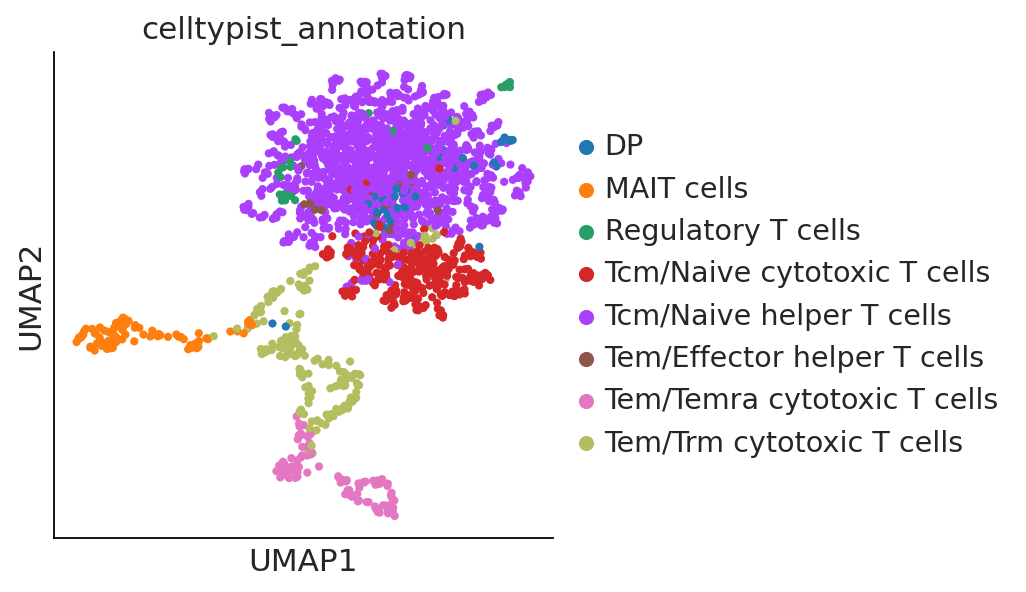

In [110]:
sc.pp.neighbors(pb_adatax_single)
sc.tl.umap(pb_adatax_single)
sc.pl.umap(pb_adatax_single, color="celltypist_annotation")

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

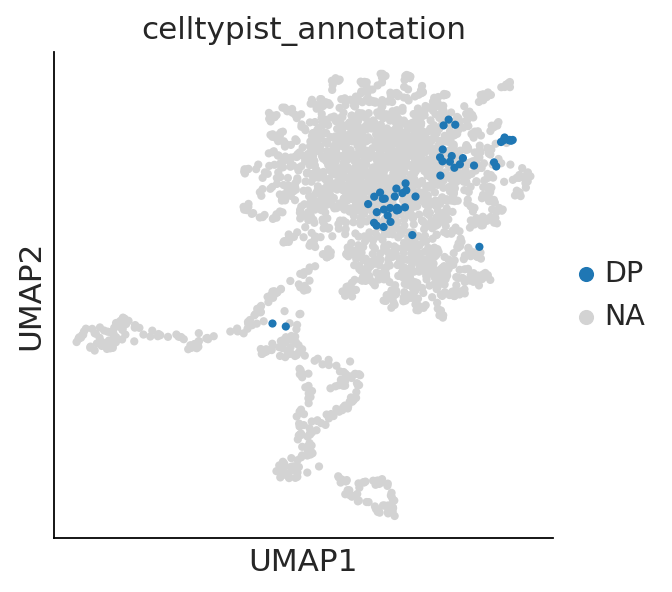

In [111]:
sc.pl.umap(pb_adatax_single, color="celltypist_annotation", groups = ['DP'])

## Filtering for anything with chains>2

In [113]:
adatax_single2 = adatax_single[adatax_single.obs['clone_id_size_max_3'].isin (['1','2'])]
adatax_single2

View of AnnData object with n_obs × n_vars = 21223 × 2285
    obs: 'sample', 'sort_type', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'batch', 'CD4/CD8_geneset', 'leiden', 'celltypist_majority_voting', 'celltypist_annotation', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig', 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

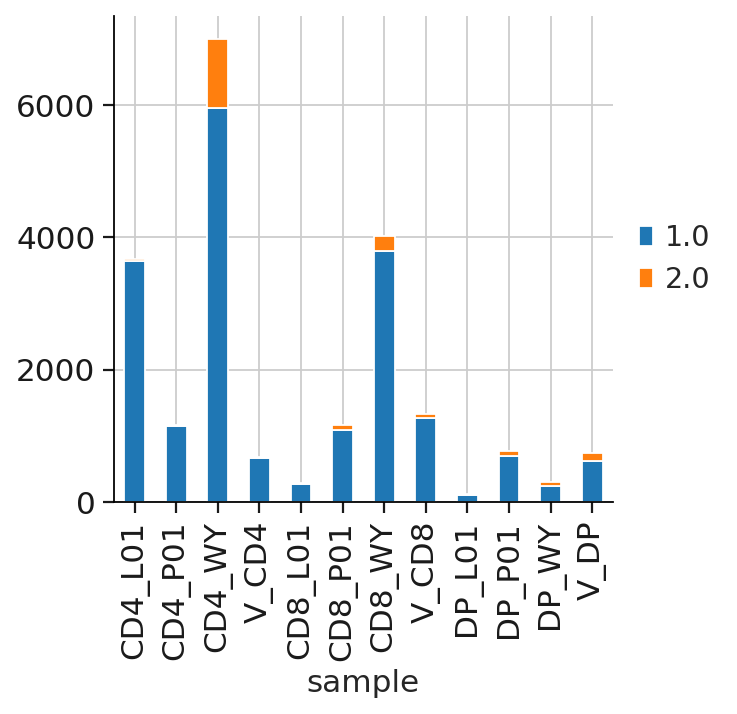

In [114]:
pd.crosstab(
    adatax_single2.obs["sample"],
    adatax_single2.obs["clone_id_size"],
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

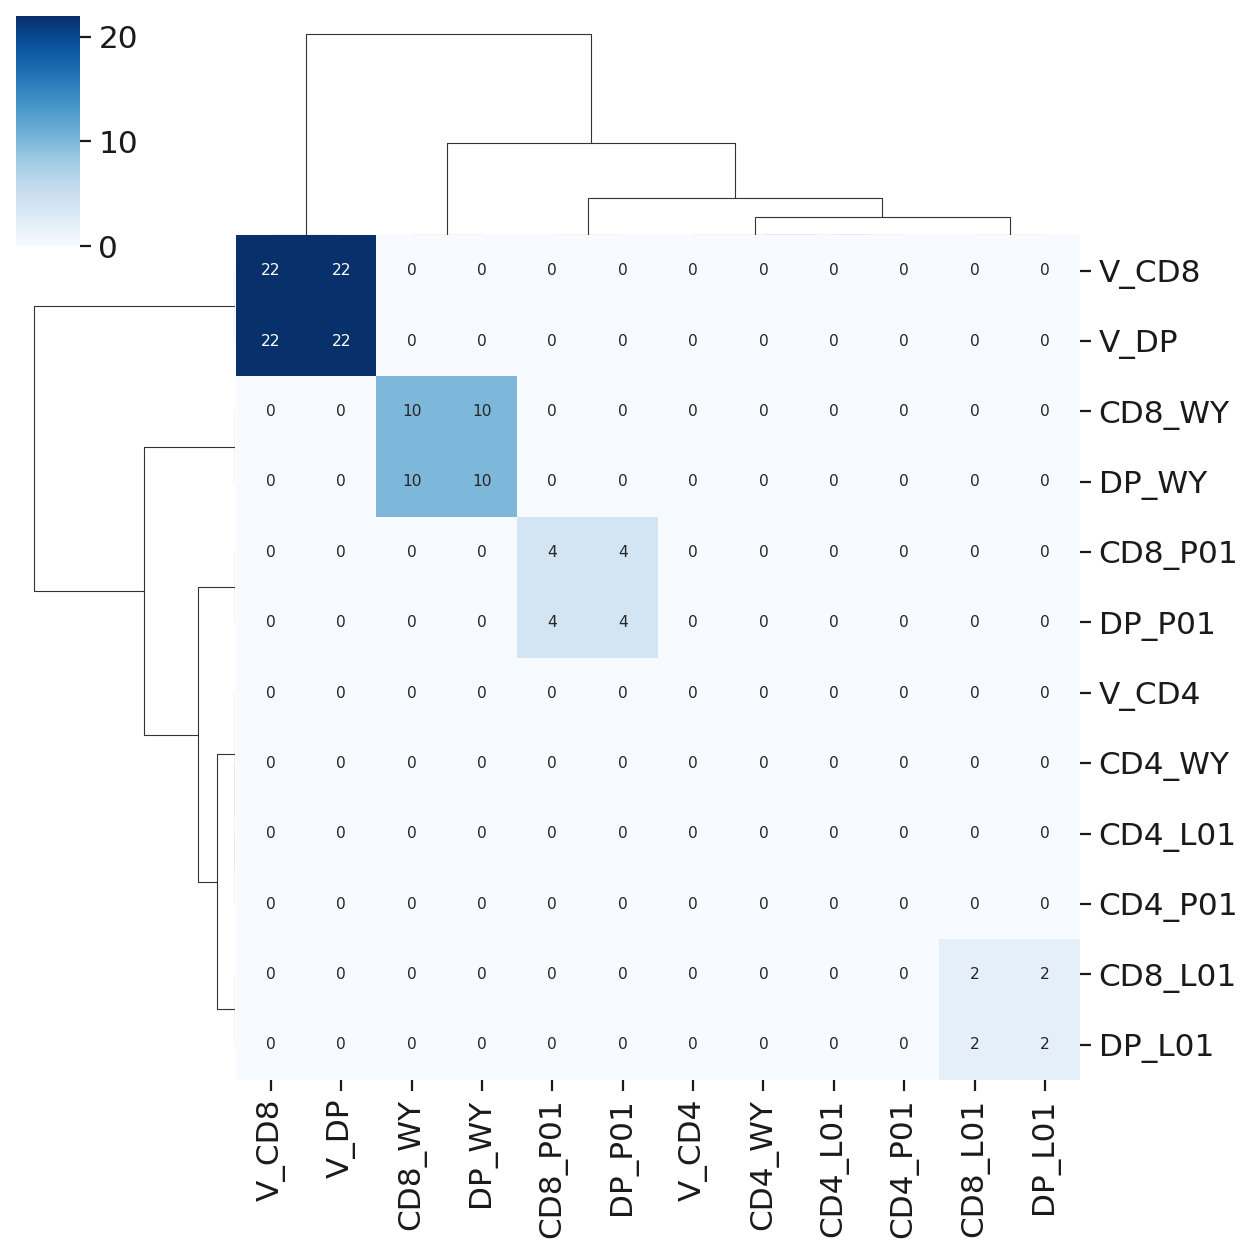

In [116]:
adatax_single2.obs["sample"] = adatax_single2.obs["sample"].cat.reorder_categories(["CD4_L01", "CD4_P01", "CD4_WY", "V_CD4","CD8_L01", "CD8_P01", "CD8_WY", "V_CD8","DP_L01", "DP_P01", "DP_WY", "V_DP",])
ddl.tl.clone_overlap(
    adatax_single2, groupby="sample", weighted_overlap=True
)

ddl.pl.clone_overlap(
    adatax_single2,
    groupby="sample",
    #colorby="celltypist_annotation",
    weighted_overlap=True,
    as_heatmap=True,
    # seaborn clustermap kwargs
    cmap="Blues",
    annot=True,
    figsize=(8, 8),
    annot_kws={"size": 7},
)

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

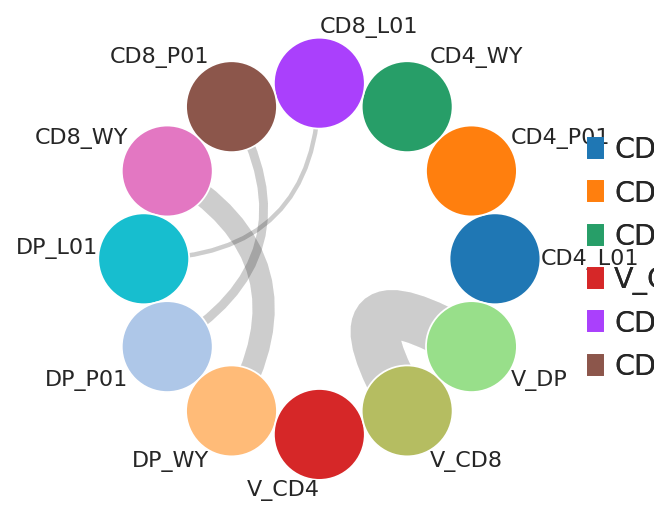

In [117]:
ddl.tl.clone_overlap(
    adatax_single2, groupby="sample", weighted_overlap=True
)

ddl.pl.clone_overlap(
    adatax_single2, groupby="sample", colorby="sample", weighted_overlap=True
)

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

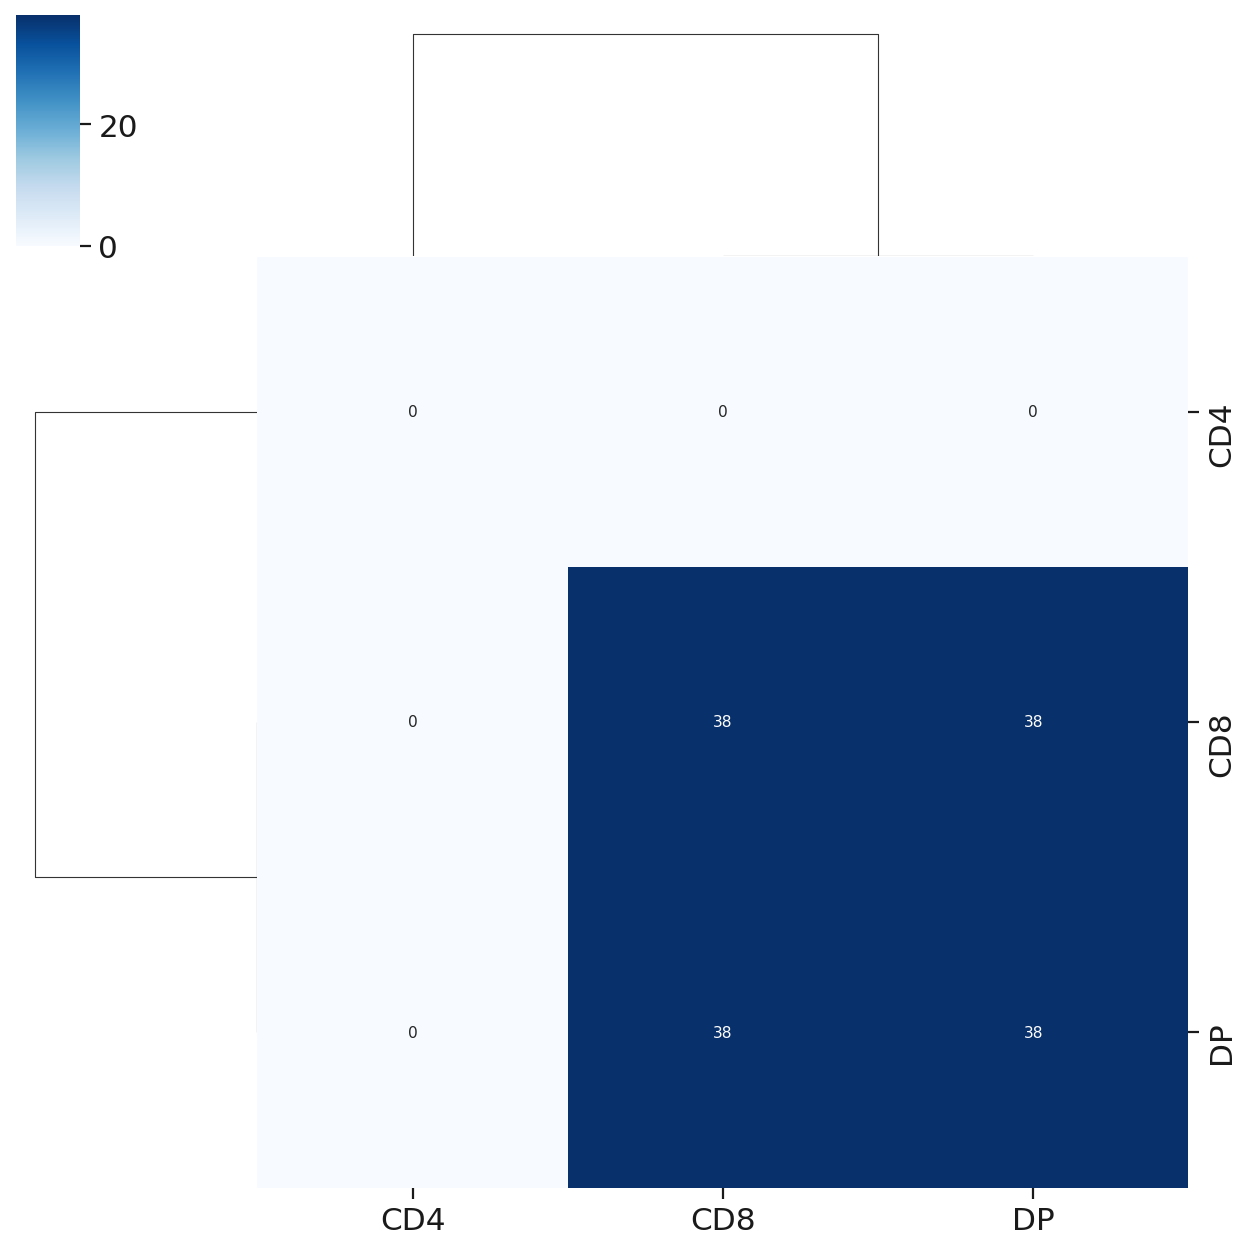

In [121]:
ddl.tl.clone_overlap(
    adatax_single2, groupby="sort_type", weighted_overlap=True
)

ddl.pl.clone_overlap(
    adatax_single2,
    groupby="sort_type",
    #colorby="celltypist_annotation",
    weighted_overlap=True,
    as_heatmap=True,
    # seaborn clustermap kwargs
    cmap="Blues",
    annot=True,
    figsize=(8, 8),
    annot_kws={"size": 7},
)

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

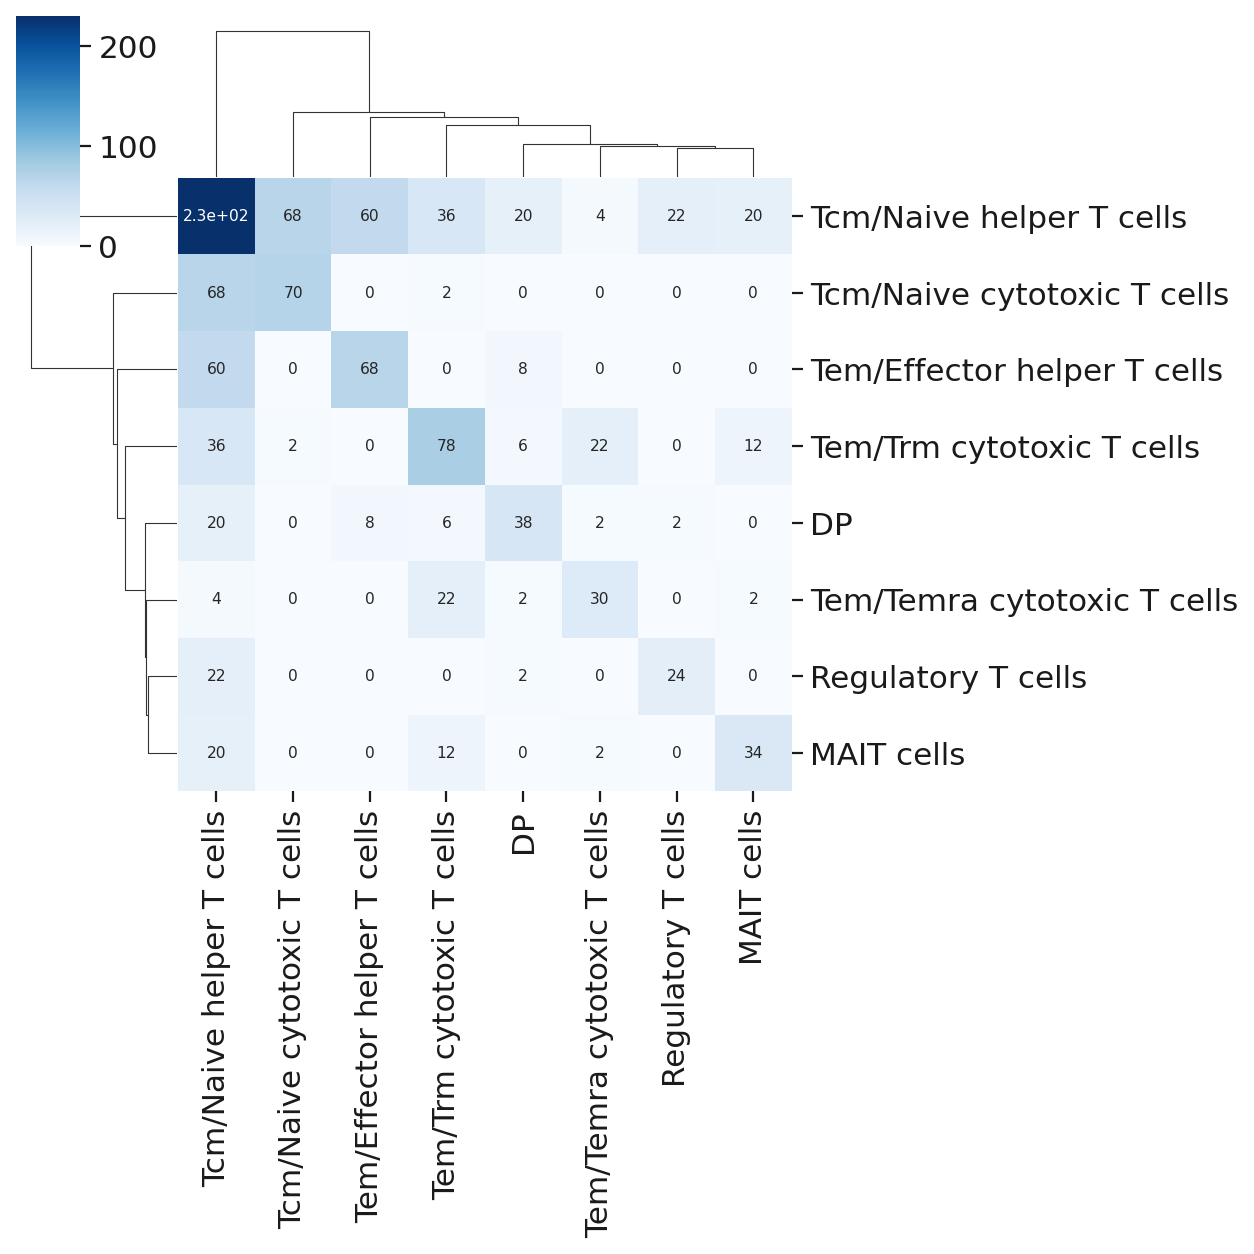

In [122]:
ddl.tl.clone_overlap(
    adatax_single2, groupby="celltypist_annotation", weighted_overlap=True
)

ddl.pl.clone_overlap(
    adatax_single2,
    groupby="celltypist_annotation",
    #colorby="celltypist_annotation",
    weighted_overlap=True,
    as_heatmap=True,
    # seaborn clustermap kwargs
    cmap="Blues",
    annot=True,
    figsize=(8, 8),
    annot_kws={"size": 7},
)

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

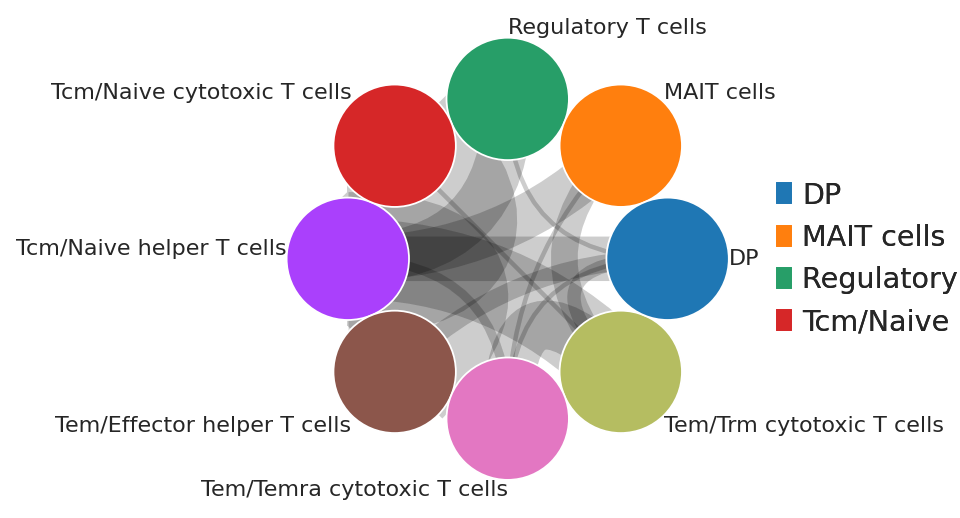

In [123]:
ddl.tl.clone_overlap(
    adatax_single2, groupby="celltypist_annotation", weighted_overlap=True
)

ddl.pl.clone_overlap(
    adatax_single2, groupby="celltypist_annotation", colorby="celltypist_annotation", weighted_overlap=True
)

### This looks better --- DP cells are MOST related to CD4s!

In [124]:
adatax_single2 = ddl.tl.setup_vdj_pseudobulk(adatax_single2)

In [125]:
sc.pp.neighbors(adatax_single2, use_rep="X_umap", n_neighbors=50)
milo.make_nhoods(adatax_single2)
sc.tl.umap(adatax_single2)

In [126]:
pb_adatax_single2 = ddl.tl.vdj_pseudobulk(
    adatax_single2, pbs=adatax_single2.obsm["nhoods"], obs_to_take="celltypist_annotation"
)

In [127]:
sc.tl.pca(pb_adatax_single2)

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

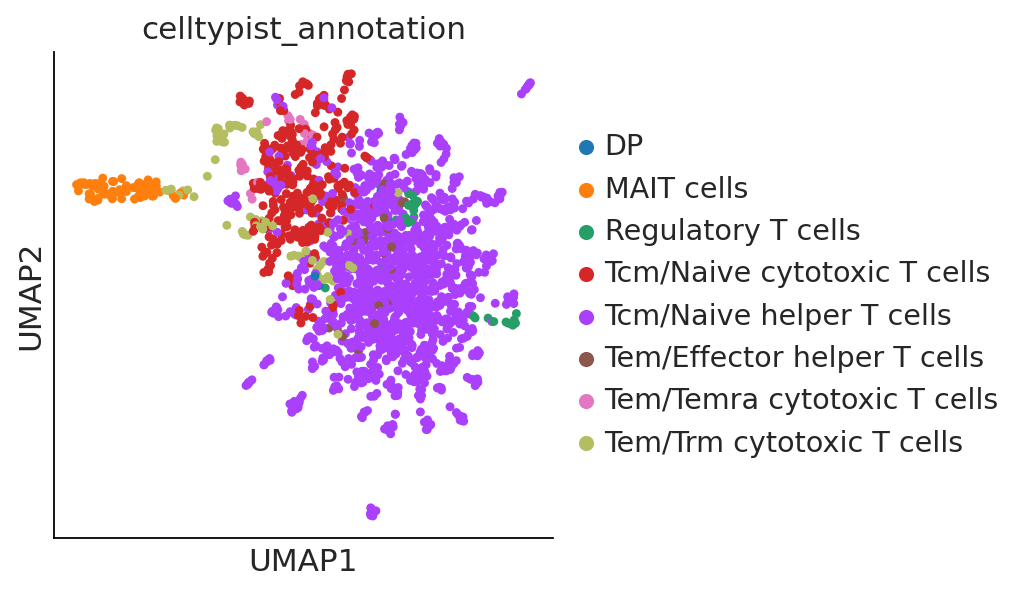

In [128]:
sc.pp.neighbors(pb_adatax_single2)
sc.tl.umap(pb_adatax_single2)
sc.pl.umap(pb_adatax_single2, color="celltypist_annotation")

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

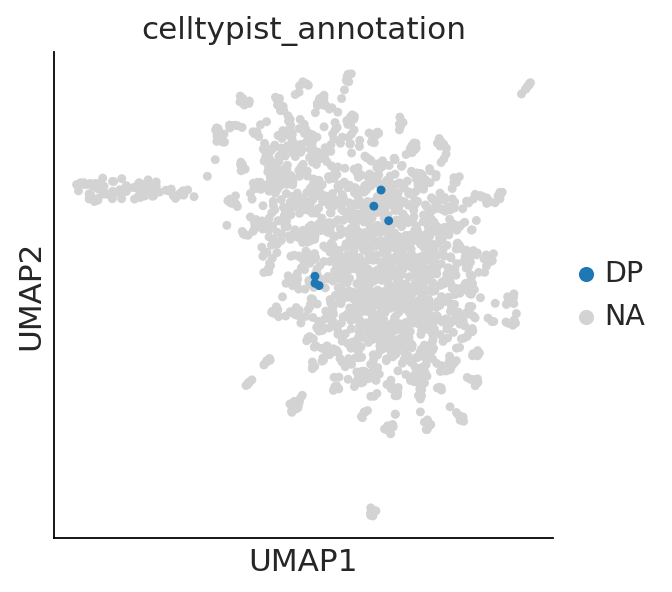

In [129]:
sc.pl.umap(pb_adatax_single2, color="celltypist_annotation", groups = ['DP'])